# Exploratory Data Analysis: Malta Road Traffic Accidents

This notebook performs a comprehensive exploratory analysis of Malta road traffic accidents to extract meaningful insights that could inform road safety policy. Based on this analysis, we will formulate research questions and determine appropriate modeling approaches (classification, regression, or both).

## Key Research Questions to Investigate:
- What factors predict accident severity?
- Can we identify high-risk time periods or locations?
- What weather conditions correlate with increased accident rates?
- Which vehicle types or road conditions are associated with serious injuries?

## 1. Setup and Data Loading

### 1.1 Import Libraries

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


### 1.2 Load Prepared Dataset

In [182]:
#data_folder = "../../data"
# Load the final prepared dataset
#data_path = f"C:\\Python\\ics5110-assignment\\data\\final\\data.csv"
#df = pd.read_csv(data_path)

df = pd.read_csv("data.csv")


print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumn names:\n{df.columns.tolist()}")

Dataset shape: 219 rows, 97 columns

Column names:
['id', 'title', 'content', 'date_published', 'accident_datetime', 'street', 'city', 'A_accident_severity', 'A_driver_age', 'A_driver_gender', 'A_number_injured', 'A_vehicle_type', 'B_accident_severity', 'B_driver_age', 'B_driver_gender', 'B_number_injured', 'B_vehicle_type', 'C_accident_severity', 'C_driver_age', 'C_driver_gender', 'C_number_injured', 'C_vehicle_type', 'D_accident_severity', 'D_driver_age', 'D_driver_gender', 'D_number_injured', 'D_vehicle_type', 'accident_date_id', 'accident_severity', 'total_injured', 'C_city', 'C_street', 'accident_time_category', 'accident_time_afternoon', 'accident_time_early_morning', 'accident_time_evening', 'accident_time_late_evening', 'accident_time_morning', 'accident_time_night', 'driver_under_18', 'driver_18_to_24', 'driver_25_to_49', 'driver_50_to_64', 'driver_65_plus', 'num_drivers_under_18', 'num_drivers_18_to_24', 'num_drivers_25_to_49', 'num_drivers_50_to_64', 'num_drivers_65_plus', '

Note: `data.csv` represents the following:

1.   The extracted features from the orignal data sets, (police press releases and local news articles
2.   Additional features extracted using LLM from the same oringal csv files
3. Concatenation of both data sets
4. Deduplication of the observations referring to the same cases
5. Extraction of additional features to enrich data set (weather/ traffic level)
6. One-hot encoding of selcted features

**In this analysis we will focus on the exploratory and explanatory analysis of the data prior encoding**
      


In [183]:
# Keep only the specified columns - exclude one hot encoded columns
columns_to_keep = [
    'id', 'title', 'content', 'date_published', 'accident_datetime',
    'A_accident_severity', 'A_driver_age', 'A_driver_gender', 'A_number_injured', 'A_vehicle_type',
    'B_accident_severity', 'B_driver_age', 'B_driver_gender', 'B_number_injured', 'B_vehicle_type',
    'C_accident_severity', 'C_driver_age', 'C_driver_gender', 'C_number_injured', 'C_vehicle_type',
    'D_accident_severity', 'D_driver_age', 'D_driver_gender', 'D_number_injured', 'D_vehicle_type',
    'accident_severity', 'total_injured', 'C_city', 'C_street', 'accident_time_category',
    'num_drivers_total', 'num_vehicle_unknown', 'num_vehicle_pedestrian', 'num_vehicle_bicycle',
    'num_vehicle_motorbike', 'num_vehicle_car', 'num_vehicle_van', 'num_vehicle_bus',
    'is_weekend', 'is_public_holiday_mt', 'is_school_holiday_mt', 'is_school_day_mt',
    'street_type', 'region', 'temperature_max', 'temperature_min', 'temperature_mean',
    'precipitation_sum', 'windspeed_max', 'is_raining', 'traffic_ratio', 'traffic_level'
]

df = df[columns_to_keep]

print(f"✓ Dataset filtered to {len(columns_to_keep)} columns")
print(f"New shape: {df.shape[0]} rows, {df.shape[1]} columns")

✓ Dataset filtered to 52 columns
New shape: 219 rows, 52 columns


In [184]:
# Check for missing values
print("=== Missing Values Analysis ===")
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if len(missing_data) > 0:
    missing_percent = (missing_data / len(df) * 100).round(2)
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Percentage': missing_percent
    })
    display(missing_df)
else:
    print("No missing values found in the dataset!")

=== Missing Values Analysis ===


,Missing Count,Percentage
D_driver_gender,217,99.09
D_number_injured,217,99.09
D_vehicle_type,217,99.09
D_driver_age,217,99.09
D_accident_severity,217,99.09
C_accident_severity,208,94.98
C_driver_age,208,94.98
C_driver_gender,208,94.98
C_vehicle_type,208,94.98
C_number_injured,208,94.98


Conclusion: There is no significant missing datsa in any column.
The reason that B_, C_, D_ features have some missing data is attributed to accidnets where less than four vehicle were involved.


## 2. Understanding the data

### 2.1 Classifying the different type of data
(String, Nominal, Ordinal, Interval, Ratio)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      219 non-null    object 
 1   title                   219 non-null    object 
 2   content                 219 non-null    object 
 3   date_published          219 non-null    object 
 4   accident_datetime       219 non-null    object 
 5   A_accident_severity     219 non-null    object 
 6   A_driver_age            219 non-null    object 
 7   A_driver_gender         219 non-null    object 
 8   A_number_injured        219 non-null    object 
 9   A_vehicle_type          219 non-null    object 
 10  B_accident_severity     133 non-null    object 
 11  B_driver_age            133 non-null    object 
 12  B_driver_gender         133 non-null    object 
 13  B_number_injured        133 non-null    object 
 14  B_vehicle_type          133 non-null    ob

In [186]:
classification_data = []

for col in df.columns:
    classification = {
        'Column Name': col,
        'Data Type': str(df[col].dtype),
        'Measurement Scale': 'Undetermined', # Default value
        'Temporal': False,
        'Location': False,
        'Weather': False,
        'Accident_char': False
    }

    # Assign Measurement Scale and categorize manually the type of feature/label
    if col in ['id', 'date_published', 'accident_datetime']:
        classification['Measurement Scale'] = 'Nominal'
        classification['Temporal'] = True
    elif col.startswith(('C_city', 'C_street')):
        classification['Measurement Scale'] = 'Nominal'
        classification['Location'] = True
    elif col.startswith(('title', 'content')):
        classification['Measurement Scale'] = 'String'
    elif col.startswith(('A_accident_severity', 'B_accident_severity', 'C_accident_severity', 'D_accident_severity', 'accident_severity')):
        classification['Measurement Scale'] = 'Ordinal'
        classification['Accident_char'] = True
    elif col.startswith(('A_driver_age', 'B_driver_age', 'C_driver_age', 'D_driver_age')):
        classification['Measurement Scale'] = 'Ratio'
        classification['Accident_char'] = True
    elif col.startswith(('A_driver_gender', 'B_driver_gender', 'C_driver_gender', 'D_driver_gender')):
        classification['Measurement Scale'] = 'Nominal'
        classification['Accident_char'] = True
    elif col.startswith(('A_number_injured', 'B_number_injured', 'C_number_injured', 'D_number_injured', 'total_injured')):
        classification['Measurement Scale'] = 'Ratio'
        classification['Accident_char'] = True
    elif col.startswith(('A_vehicle_type', 'B_vehicle_type', 'C_vehicle_type', 'D_vehicle_type')):
        classification['Measurement Scale'] = 'Nominal'
        classification['Accident_char'] = True
    elif col == 'accident_time_category': # Special case for temporal nominal
        classification['Measurement Scale'] = 'Nominal'
        classification['Temporal'] = True
    elif col.startswith(('num_drivers_', 'num_vehicle_')):
        classification['Measurement Scale'] = 'Interval'
        classification['Accident_char'] = True
    elif col in ['is_weekend', 'is_public_holiday_mt', 'is_school_holiday_mt', 'is_school_day_mt']:
        classification['Measurement Scale'] = 'Nominal'
        classification['Temporal'] = True
    elif col in ['is_raining']:
        classification['Measurement Scale'] = 'Nominal'
        classification['Weather'] = True
    elif col in ['temperature_max', 'temperature_min', 'temperature_mean']:
        classification['Measurement Scale'] = 'Interval'
        classification['Weather'] = True
    elif col in ['precipitation_sum', 'windspeed_max', 'traffic_ratio']:
        classification['Measurement Scale'] = 'Ratio'
        classification['Weather'] = True
    elif col == 'traffic_level': # Special case for ordinal
        classification['Measurement Scale'] = 'Ordinal'
        classification['Location'] = True # Traffic level is location-dependent
    elif col in ['street_type', 'region']:
        classification['Measurement Scale'] = 'Nominal'
        classification['Location'] = True

    classification_data.append(classification)

classification_df = pd.DataFrame(classification_data)

display(classification_df)

,Column Name,Data Type,Measurement Scale,Temporal,Location,Weather,Accident_char
0,id,object,Nominal,True,False,False,False
1,title,object,String,False,False,False,False
2,content,object,String,False,False,False,False
3,date_published,object,Nominal,True,False,False,False
4,accident_datetime,object,Nominal,True,False,False,False
5,A_accident_severity,object,Ordinal,False,False,False,True
6,A_driver_age,object,Ratio,False,False,False,True
7,A_driver_gender,object,Nominal,False,False,False,True
8,A_number_injured,object,Ratio,False,False,False,True
9,A_vehicle_type,object,Nominal,False,False,False,True


from matplotlib import pyplot as plt
import seaborn as sns
classification_df.groupby('Data Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
classification_df.groupby('Measurement Scale').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
classification_df.groupby('Temporal').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
classification_df.groupby('Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Measurement Scale'].value_counts()
    for x_label, grp in classification_df.groupby('Data Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Data Type')
_ = plt.ylabel('Measurement Scale')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Temporal'].value_counts()
    for x_label, grp in classification_df.groupby('Measurement Scale')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Measurement Scale')
_ = plt.ylabel('Temporal')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Location'].value_counts()
    for x_label, grp in classification_df.groupby('Temporal')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Temporal')
_ = plt.ylabel('Location')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Weather'].value_counts()
    for x_label, grp in classification_df.groupby('Location')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Location')
_ = plt.ylabel('Weather')

## Summary:

*   The `classification_df` was successfully restructured to include `Column Name`, `Data Type`, `Measurement Scale`, and four new boolean classification columns: `Temporal`, `Location`, `Weather`, and `Accident_char`.
*   Boolean flags were accurately assigned based on predefined patterns, categorizing columns as follows:
    *   **Temporal:** `id`, `date_published`, `accident_datetime`, `accident_time_category`, `is_weekend`, `is_public_holiday_mt`, `is_school_holiday_mt`, `is_school_day_mt`.
    *   **Location:** `C_city`, `C_street`, `street_type`, `region`, `traffic_level`.
    *   **Weather:** `temperature_max`, `temperature_min`, `temperature_mean`, `precipitation_sum`, `windspeed_max`, `is_raining`, `traffic_ratio`.
    *   **Accident\_char:** `A_accident_severity`, `A_driver_age`, `A_driver_gender`, `A_number_injured`, `A_vehicle_type`, `total_injured`, `num_drivers_total`, `num_vehicle_pedestrian`, etc.
*   The `Measurement Scale` for each column was set to 'Nominal', 'Ordinal', 'Ratio', 'Interval' or 'String'



In [208]:
df.describe()

,date_published,accident_datetime,A_driver_age,A_number_injured,B_driver_age,B_number_injured,C_driver_age,C_number_injured,D_driver_age,D_number_injured,...,num_vehicle_motorbike,num_vehicle_car,num_vehicle_van,num_vehicle_bus,temperature_max,temperature_min,temperature_mean,precipitation_sum,windspeed_max,traffic_ratio
count,219,219,197.000000,217.000000,110.000000,132.000000,9.000000,11.000000,2.00000,2.0,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2025-05-23 14:41:05.753424640,2025-02-28 23:21:16.712328448,42.167513,0.824885,42.109091,0.787879,58.222222,0.818182,41.00000,0.0,...,0.488584,0.858447,0.141553,0.050228,23.938813,18.605936,21.123744,1.112785,20.718721,1.042037
min,2024-12-07 00:00:00,2006-12-17 00:00:00,2.000000,0.000000,5.000000,0.000000,29.000000,0.000000,27.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,13.400000,9.000000,11.800000,0.000000,6.100000,0.722581
25%,2025-02-21 00:00:00,2025-02-10 03:22:30,28.000000,0.000000,30.000000,0.000000,50.000000,0.000000,34.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,17.900000,13.900000,16.000000,0.000000,12.900000,0.919255
50%,2025-06-07 00:00:00,2025-06-03 04:30:00,39.000000,1.000000,38.500000,1.000000,67.000000,1.000000,41.00000,0.0,...,0.000000,1.000000,0.000000,0.000000,25.000000,18.600000,21.200000,0.000000,19.400000,1.018868
75%,2025-08-10 00:00:00,2025-08-07 04:00:00,54.000000,1.000000,52.750000,1.000000,68.000000,1.000000,48.00000,0.0,...,1.000000,1.000000,0.000000,0.000000,29.500000,23.250000,26.100000,0.400000,26.350000,1.098309
max,2025-10-10 00:00:00,2025-10-10 09:00:00,86.000000,9.000000,87.000000,4.000000,81.000000,2.000000,55.00000,0.0,...,3.000000,3.000000,2.000000,1.000000,37.500000,26.400000,31.100000,66.500000,53.400000,2.080000
std,NaN,NaN,17.630486,0.880198,17.854841,0.642399,18.565949,0.750757,19.79899,0.0,...,0.553228,0.644710,0.374728,0.218916,6.239876,4.989651,5.445155,5.172929,9.788767,0.183529


Conclusion:
`A_Driver_age`, `A_number_injured` are not classified as integers/ float due to some content listed as text 'Unknown'

### 2.2 **Nominal** data analysis

Conclusion 1: Intial plots revealed issues with capitilazation and 'unknown' classification somethimes referred to as 'none'

Solution 1: fix source data and re-run


In [188]:
columns_to_clean = [
    'A_driver_gender', 'A_vehicle_type',
    'B_driver_gender', 'B_vehicle_type',
    'C_driver_gender', 'C_vehicle_type',
    'D_driver_gender', 'D_vehicle_type'
]

for col in columns_to_clean:
    if col in df.columns and df[col].dtype == 'object':
        # Replace 'none' with 'unknown' (case-insensitive if needed, but assuming exact match for now)
        df[col] = df[col].replace('none', 'unknown', regex=True)
        # Convert all to lowercase
        df[col] = df[col].astype(str).str.lower()

print("✓ Specified columns have been cleaned (replaced 'none' with 'unknown' and converted to lowercase).")


✓ Specified columns have been cleaned (replaced 'none' with 'unknown' and converted to lowercase).


Generating count plots for nominal variables:


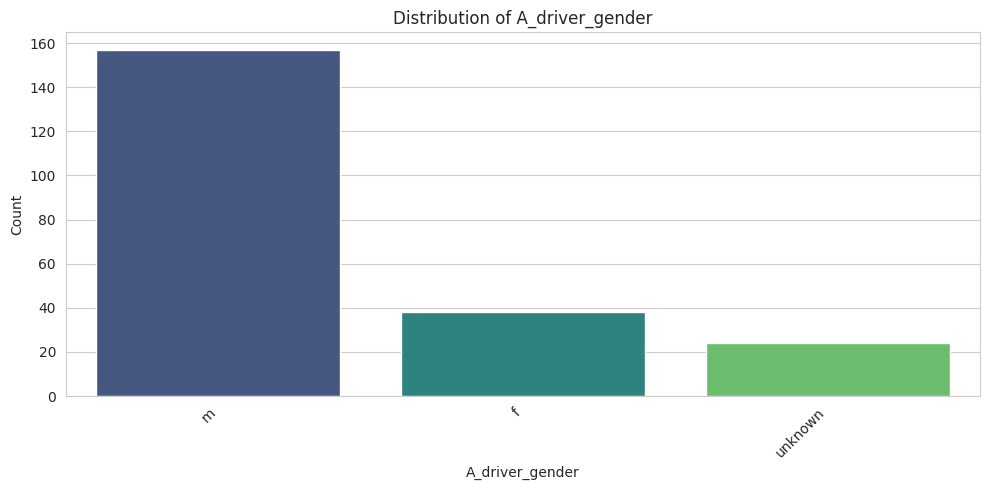

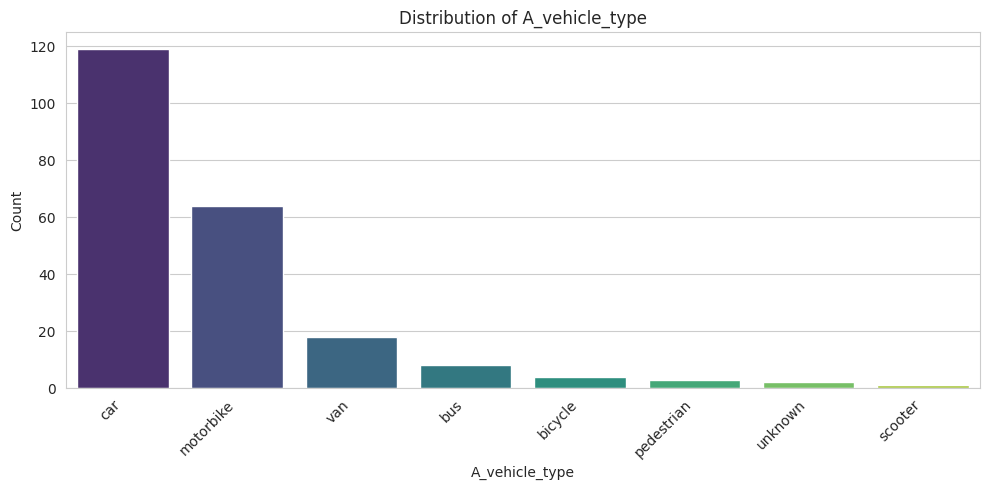

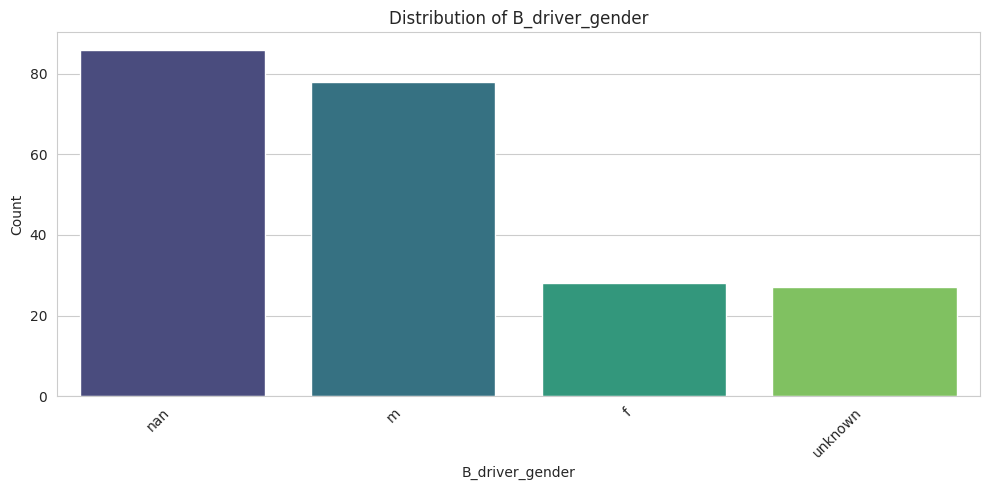

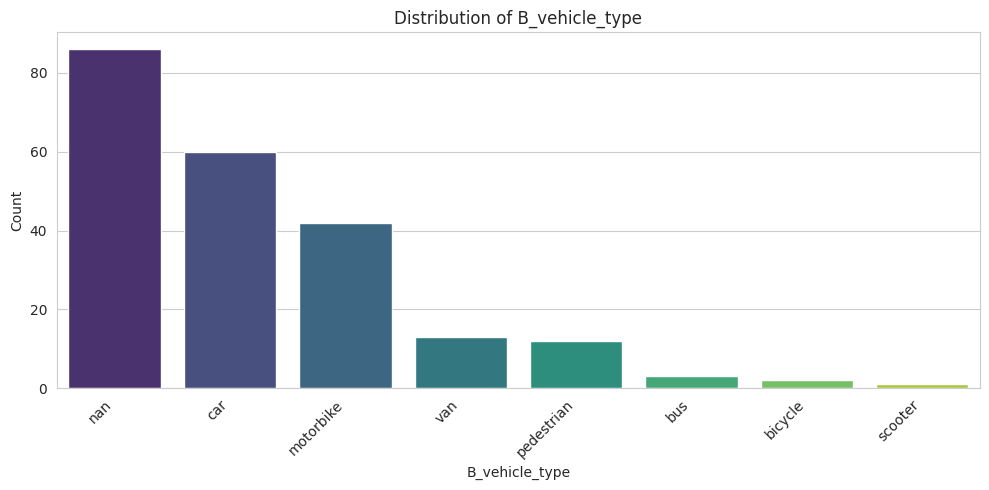

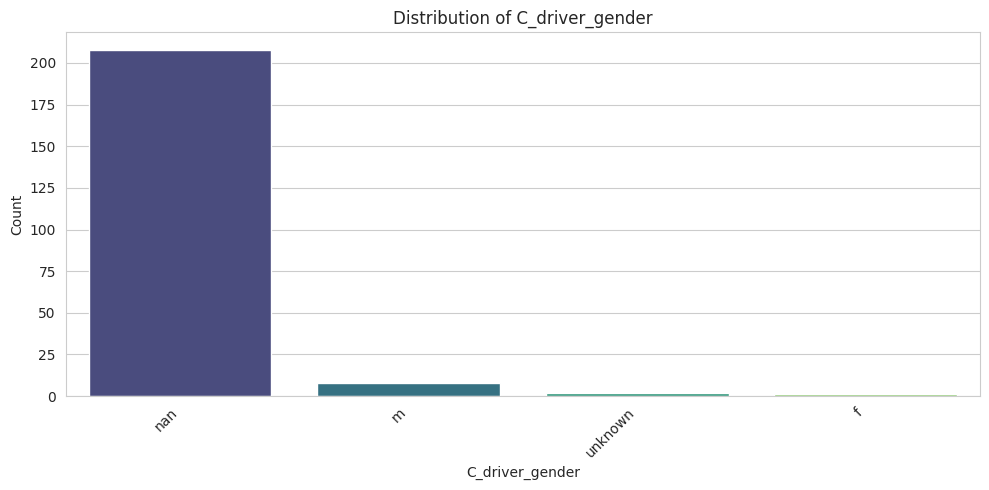

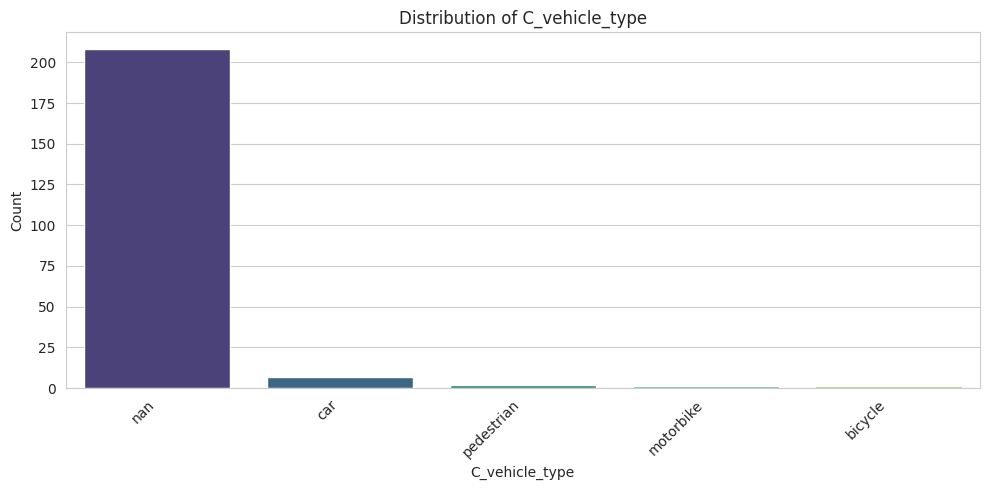

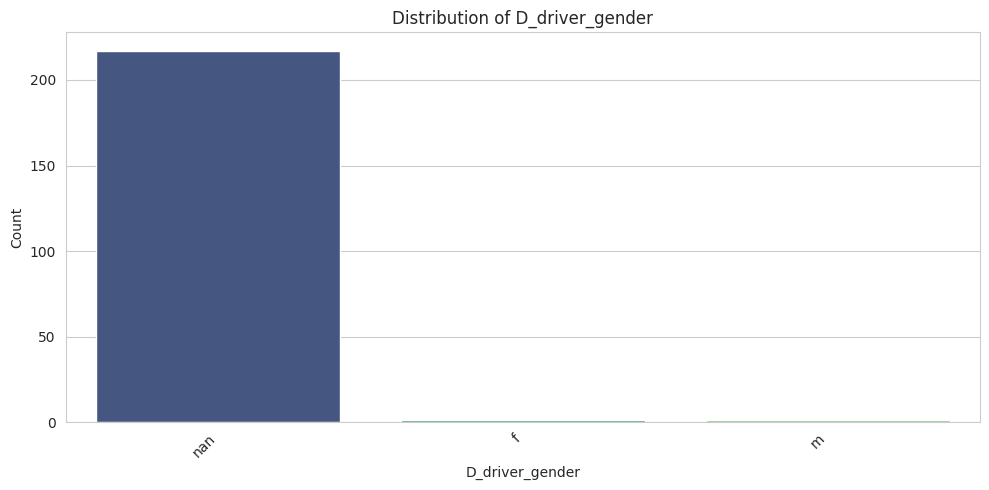

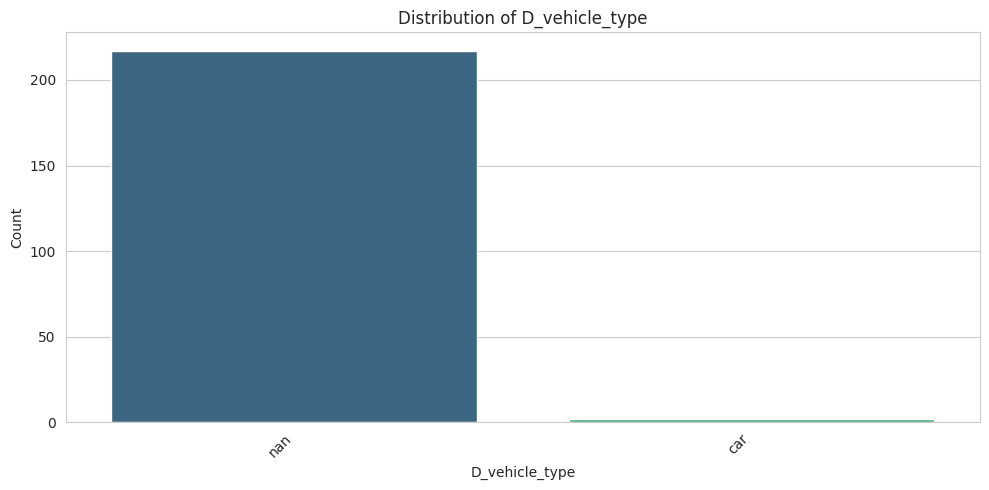

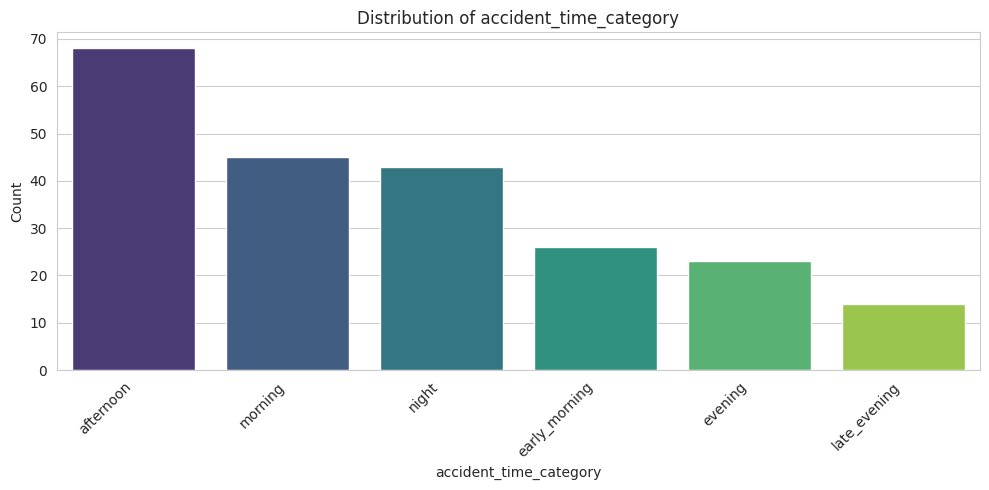

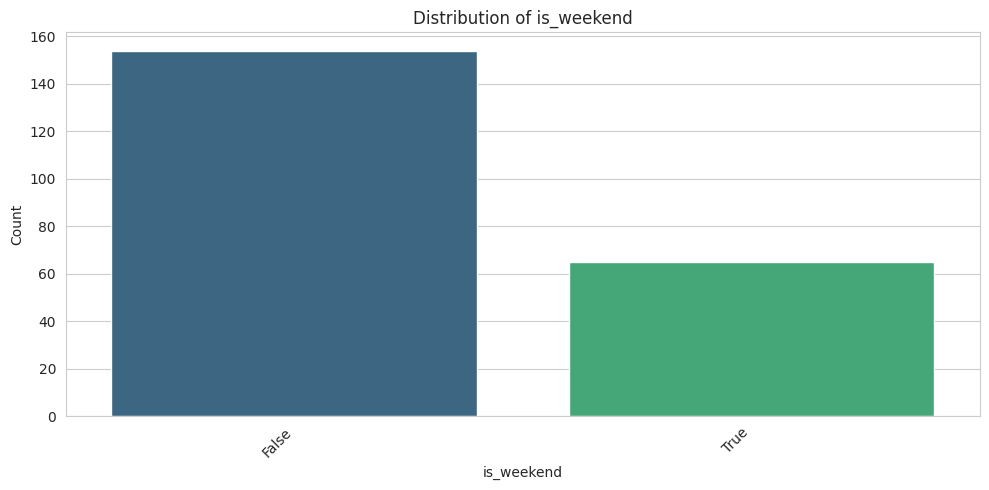

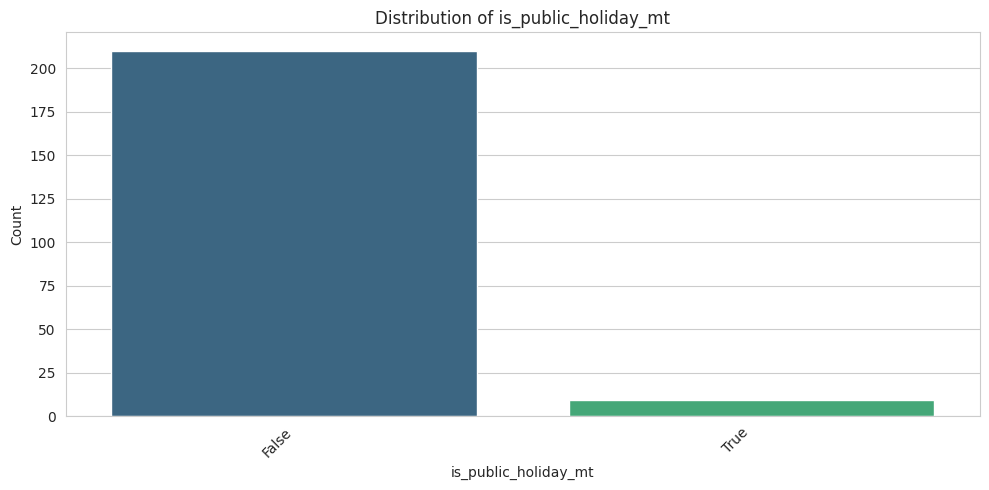

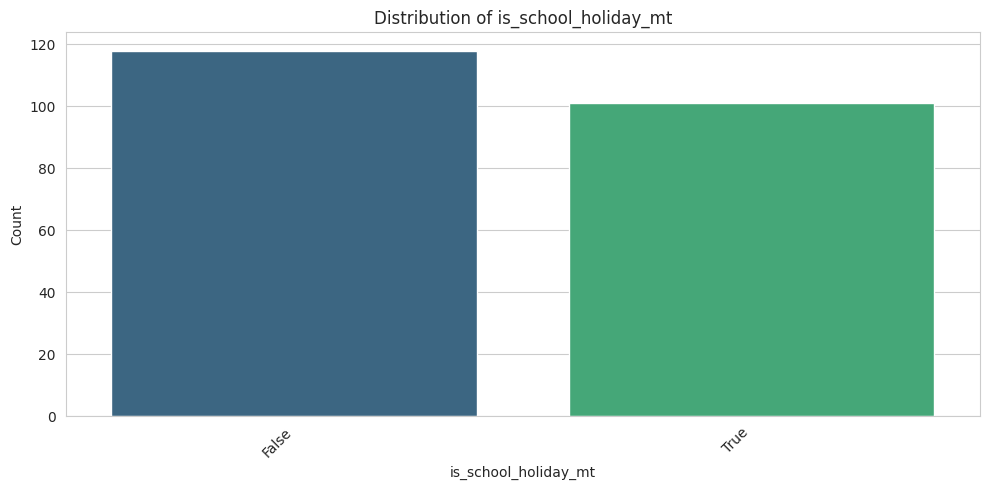

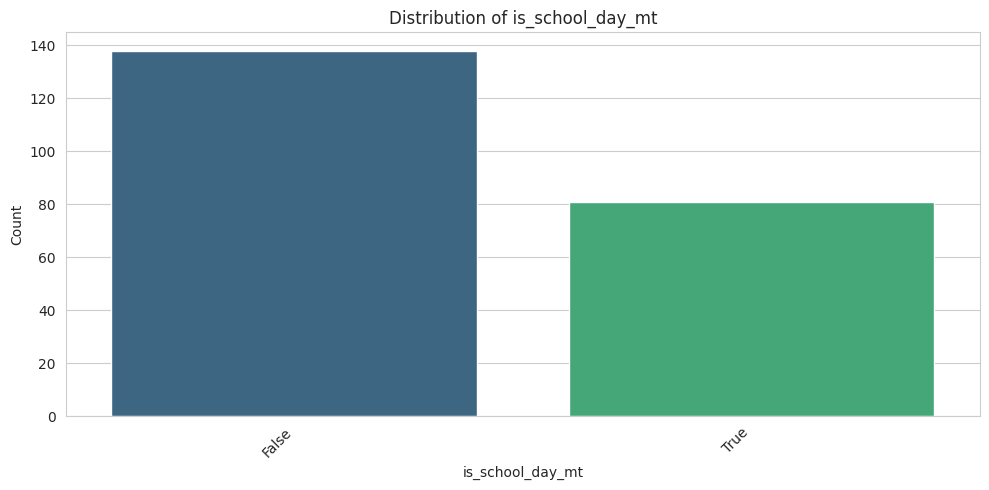

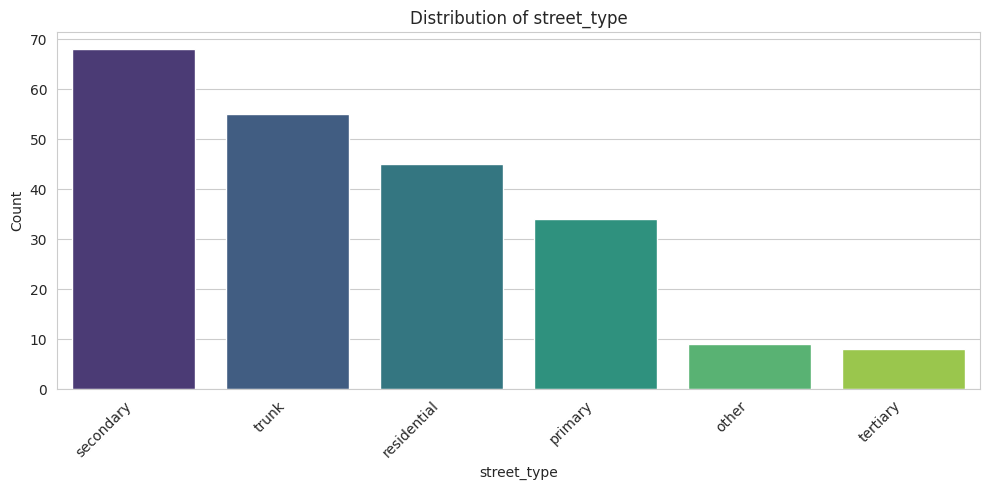

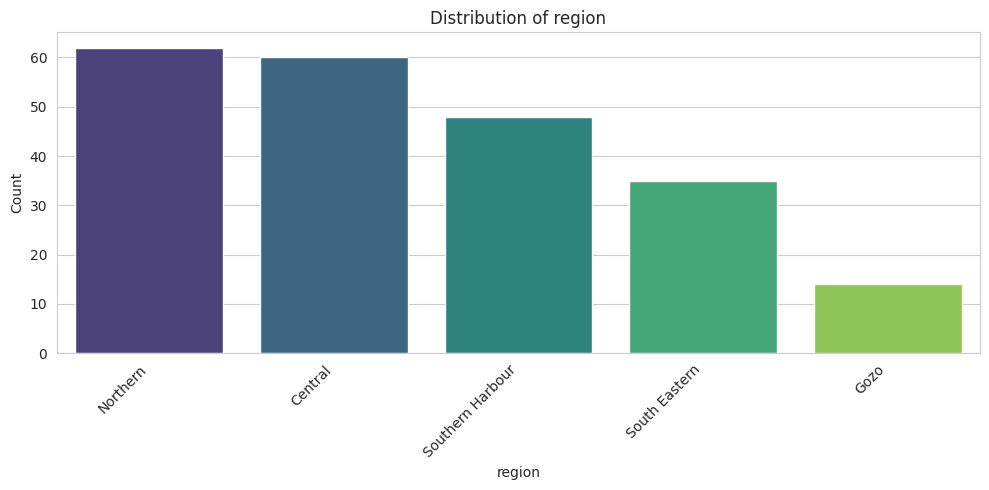

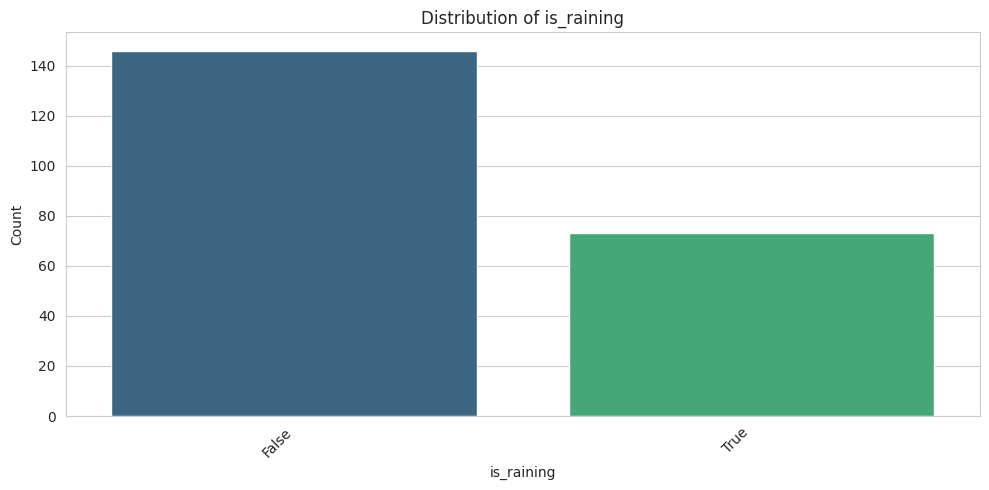

Finished generating count plots for nominal variables.


In [189]:
nominal_columns = classification_df[classification_df['Measurement Scale'] == 'Nominal']['Column Name'].tolist()

# Exclude columns that are unique identifiers or have too many unique values for a meaningful countplot
excluded_nominal_columns = [
    'id', 'date_published', 'accident_datetime', 'C_city', 'C_street'
]

nominal_columns_to_plot = [col for col in nominal_columns if col not in excluded_nominal_columns]

print("Generating count plots for nominal variables:")
for col in nominal_columns_to_plot:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("Finished generating count plots for nominal variables.")

In [190]:
unknown_data_percentages_raw = []

for col in df.columns:
    # Only consider columns that are of object type as they might contain string 'unknown'
    if df[col].dtype == 'object':
        # Create a temporary series with all values converted to string and lowercase
        # to ensure consistent detection of 'unknown' regardless of original casing.
        temp_series = df[col].astype(str).str.lower()

        # Count non-null values in the original column to use as the denominator for percentage
        total_non_null_values = df[col].count()

        if total_non_null_values > 0:
            unknown_count = (temp_series == 'unknown').sum()

            # Only add to the list if 'unknown' values are present in the column
            if unknown_count > 0:
                percentage = (unknown_count / total_non_null_values) * 100
                unknown_data_percentages_raw.append({
                    'Column Name': col,
                    'Unknown Count': unknown_count,
                    'Total Non-Null Values in Column': total_non_null_values,
                    'Percentage Unknown (raw)': percentage # Store raw percentage for accurate sorting
                })

# Create a DataFrame from the collected data
unknown_df = pd.DataFrame(unknown_data_percentages_raw)

# Display the DataFrame, sorted by the percentage of unknown values
if not unknown_df.empty:
    # Sort by the raw percentage and then format it for display
    unknown_df_sorted = unknown_df.sort_values(by='Percentage Unknown (raw)', ascending=False).copy()
    unknown_df_sorted['Percentage Unknown'] = unknown_df_sorted['Percentage Unknown (raw)'].apply(lambda x: f'{x:.2f}%')
    unknown_df_sorted = unknown_df_sorted.drop(columns=['Percentage Unknown (raw)'])

    print("Table showing percentage of 'unknown' data per column (relative to non-null entries):")
    display(unknown_df_sorted)
else:
    print("No 'unknown' values found in any object columns of the DataFrame.")

Table showing percentage of 'unknown' data per column (relative to non-null entries):


,Column Name,Unknown Count,Total Non-Null Values in Column,Percentage Unknown
6,B_driver_gender,27,219,12.33%
2,A_driver_gender,24,219,10.96%
5,B_driver_age,9,133,6.77%
4,B_accident_severity,5,133,3.76%
1,A_driver_age,6,219,2.74%
0,A_accident_severity,5,219,2.28%
3,A_vehicle_type,2,219,0.91%
7,C_driver_gender,2,219,0.91%


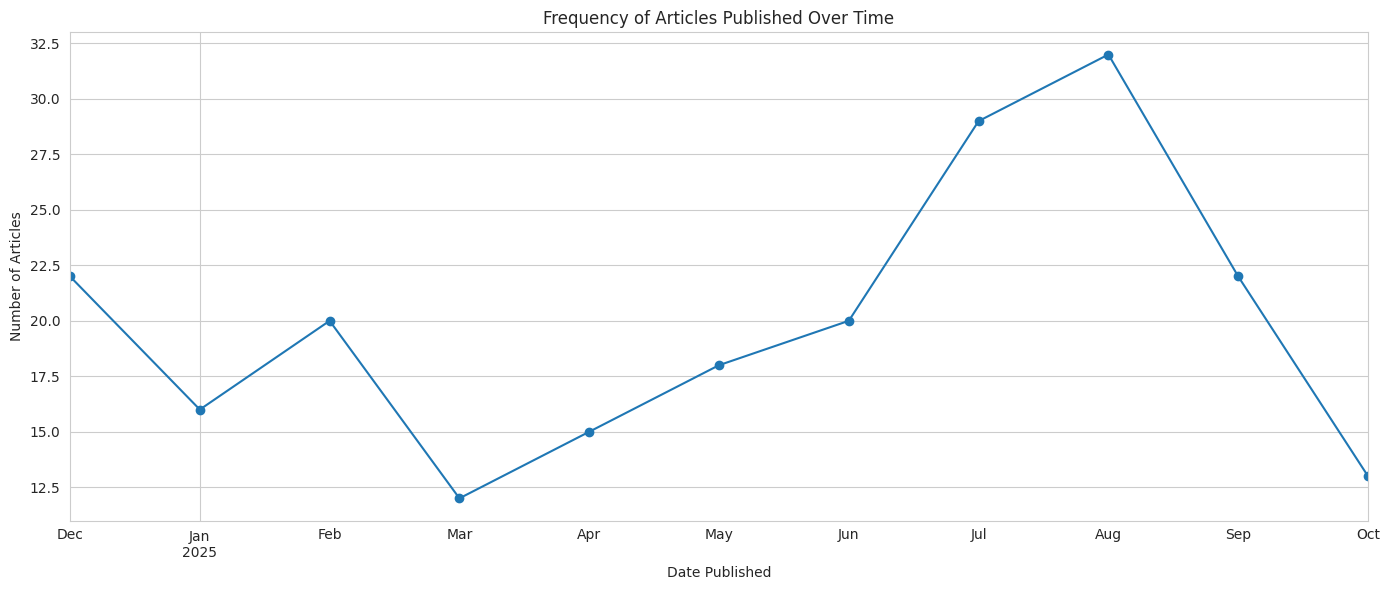

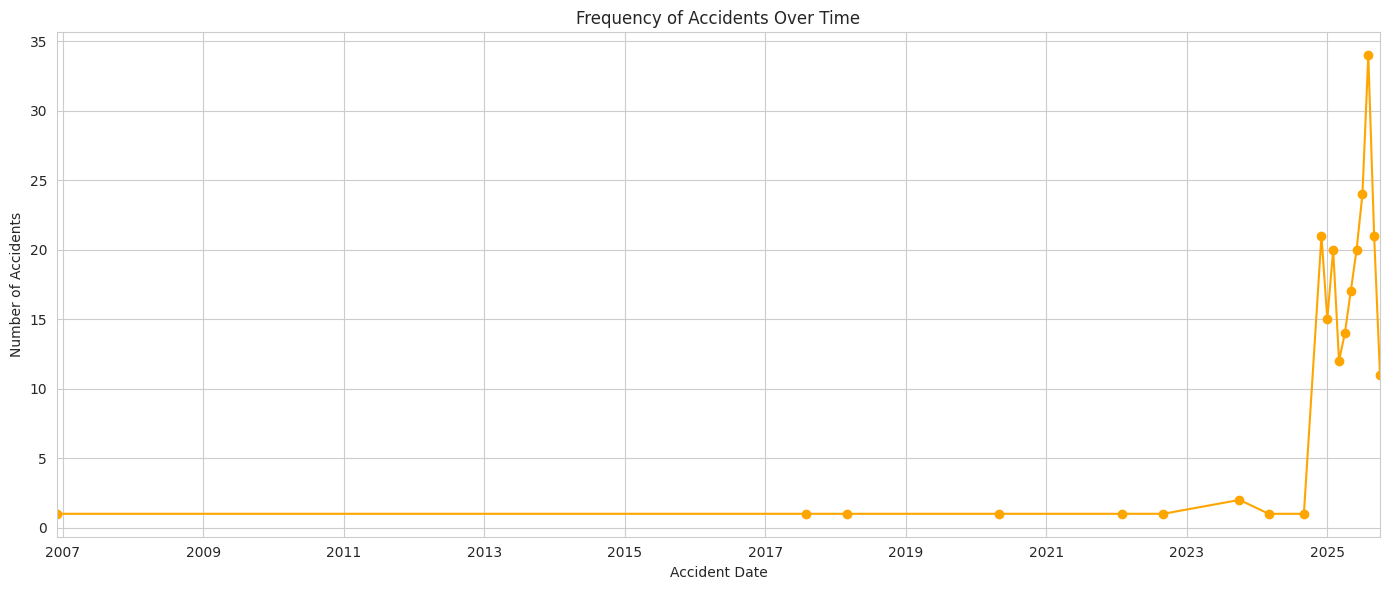

In [207]:
# Convert 'date_published' to datetime objects
df['date_published'] = pd.to_datetime(df['date_published'])

# Convert 'accident_datetime' to datetime objects
df['accident_datetime'] = pd.to_datetime(df['accident_datetime'])

# Plotting distribution of date_published
plt.figure(figsize=(14, 6))
df['date_published'].dt.to_period('M').value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Frequency of Articles Published Over Time')
plt.xlabel('Date Published')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting distribution of accident_datetime
plt.figure(figsize=(14, 6))
df['accident_datetime'].dt.to_period('M').value_counts().sort_index().plot(kind='line', marker='o', color='orange')
plt.title('Frequency of Accidents Over Time')
plt.xlabel('Accident Date')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

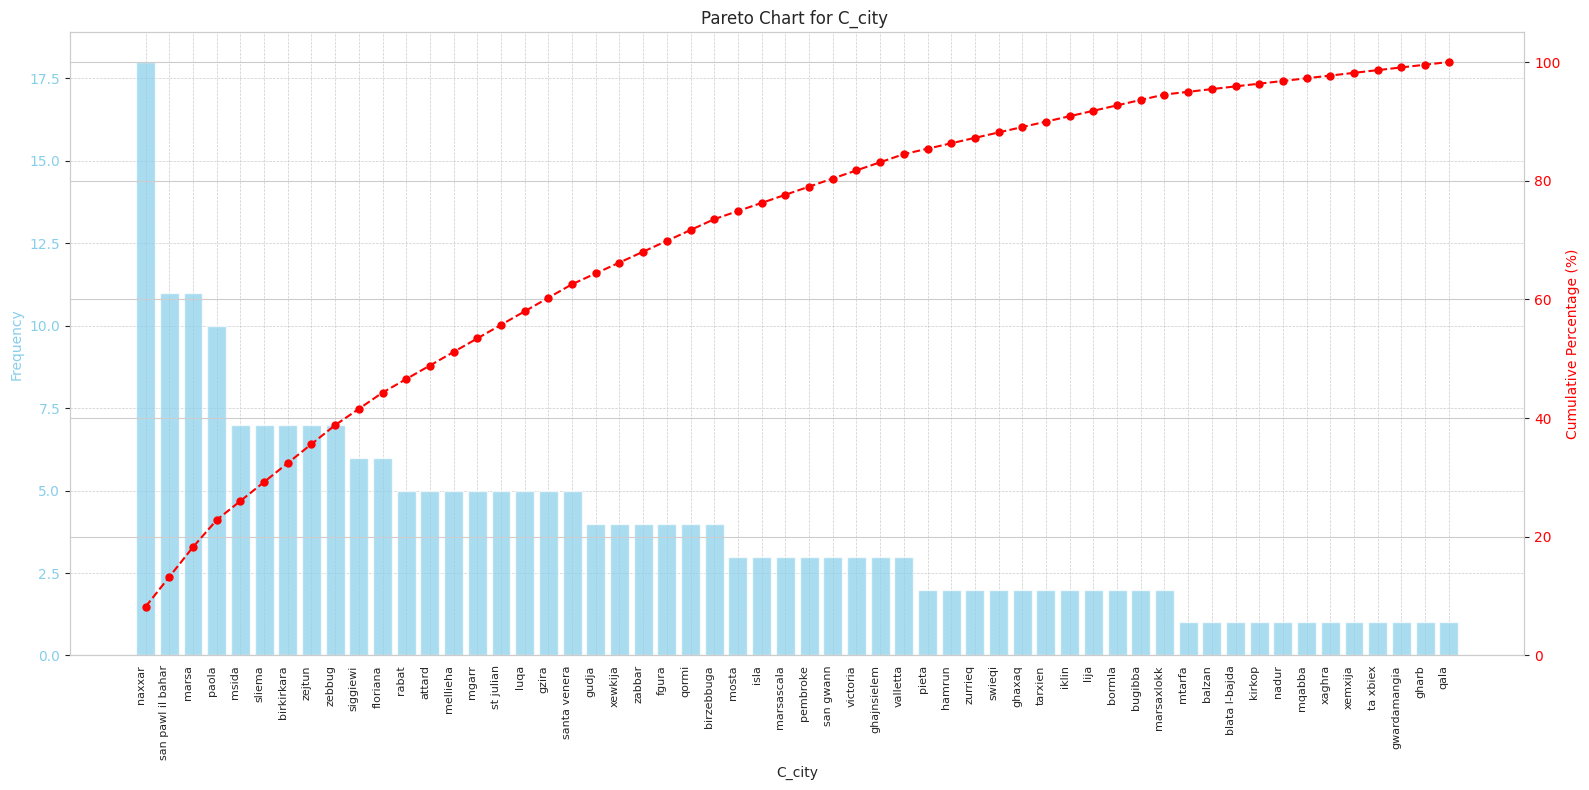

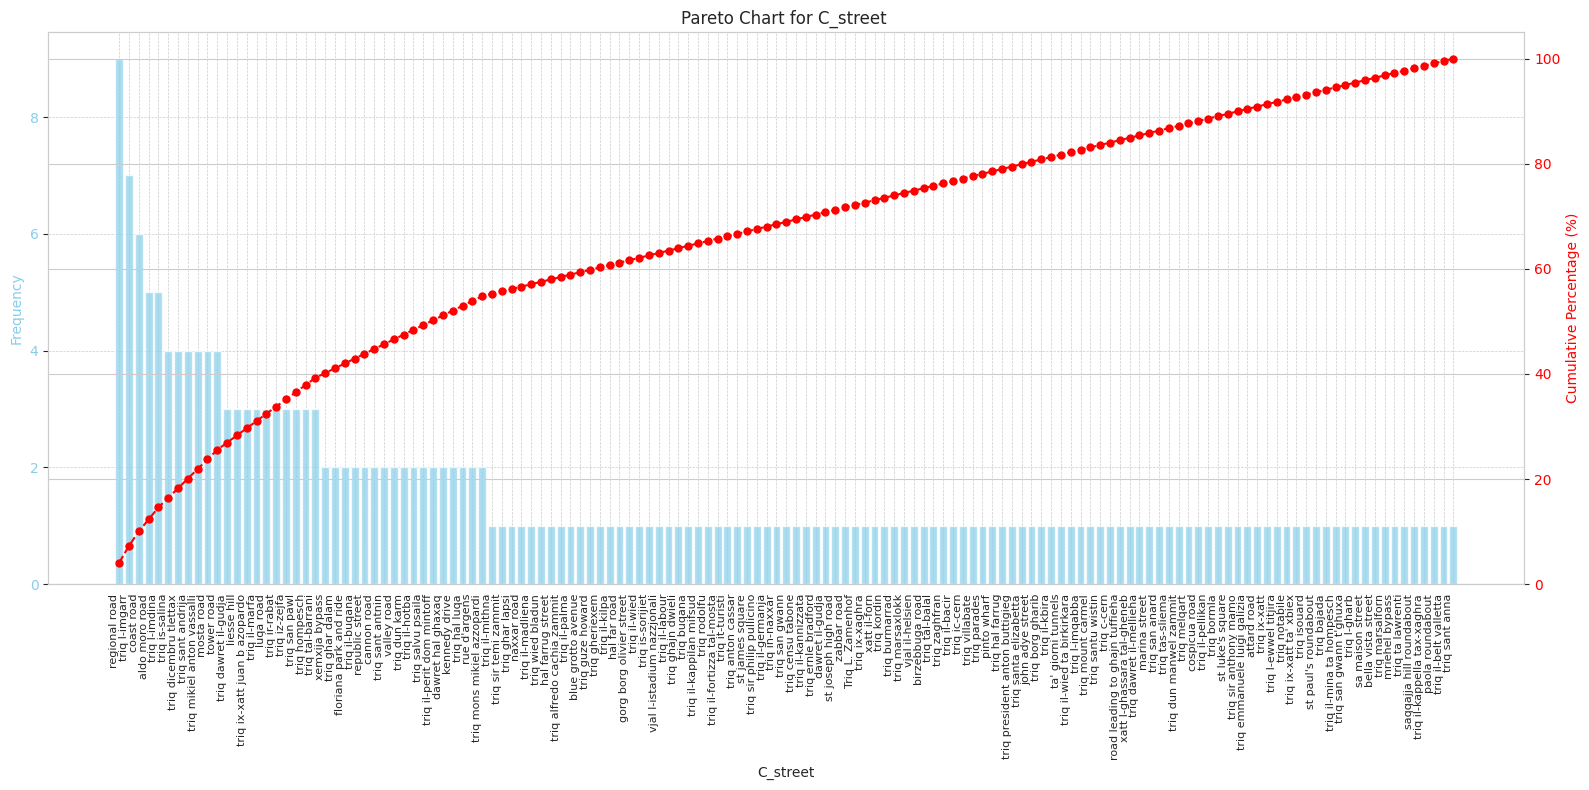

In [192]:
def generate_pareto_chart(df, column, title_suffix=""):
    """Generates a Pareto chart for a given DataFrame column."""
    counts = df[column].value_counts()
    cumulative_percentage = counts.cumsum() / counts.sum() * 100

    fig, ax1 = plt.subplots(figsize=(16, 8))

    # Bar plot for frequencies
    ax1.bar(counts.index, counts.values, color='skyblue', alpha=0.7)
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax1.set_title(f'Pareto Chart for {column} {title_suffix}')

    # Rotate x-axis labels for better readability if there are many categories
    if len(counts.index) > 10:
        ax1.set_xticklabels(counts.index, rotation=90, ha='right', fontsize=8)
    else:
        ax1.set_xticklabels(counts.index, rotation=45, ha='right')

    # Line plot for cumulative percentage
    ax2 = ax1.twinx() # Create a second y-axis
    ax2.plot(counts.index, cumulative_percentage, color='red', marker='o', linestyle='--', markersize=5)
    ax2.set_ylabel('Cumulative Percentage (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 105) # Set y-limit slightly above 100% for better visualization

    # Add grid and layout adjustments
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Generate Pareto charts for the requested columns
columns_for_pareto = ['C_city', 'C_street']

for col in columns_for_pareto:
    if col in df.columns:
        generate_pareto_chart(df, col)
    else:
        print(f"Column '{col}' not found in the DataFrame.")


**Conclusion 2:**



1.   High percentaqge of gender is 'unknown'
2.   A significant % of age is 'unknown'
3.   Extracts from A_B_C_D_accident severity are not relevant as we will focus on the overall acciudent severity classification
4.   Accidents reports used in this data set were published between Dec 2024 and Oct 2025
5.  These accidents occurred mainly in 2024/ 2025 however some unique cases date back up to 2007
6.  Pareto graphs for City and streets show a significant locality/ street prone to accidents

**Action 2:**

Truncate accidents occurring prior to 2024 [Not done]


### 2.3 **Ordinal** data analysis

Conclusion 1: Intial plots revealed issues with capitilazation

Solution 1: fix source data and re-run

In [193]:
columns_to_clean2 = [
    'A_accident_severity', 'B_accident_severity',
    'C_accident_severity', 'D_accident_severity',
    'accident_severity'
]

for col in columns_to_clean2:
    if col in df.columns and df[col].dtype == 'object':
        # Convert all to lowercase
        df[col] = df[col].astype(str).str.lower()

print("✓ Specified columns have been converted to lowercase).")


✓ Specified columns have been converted to lowercase).


Generating count plots for ordinal variables:


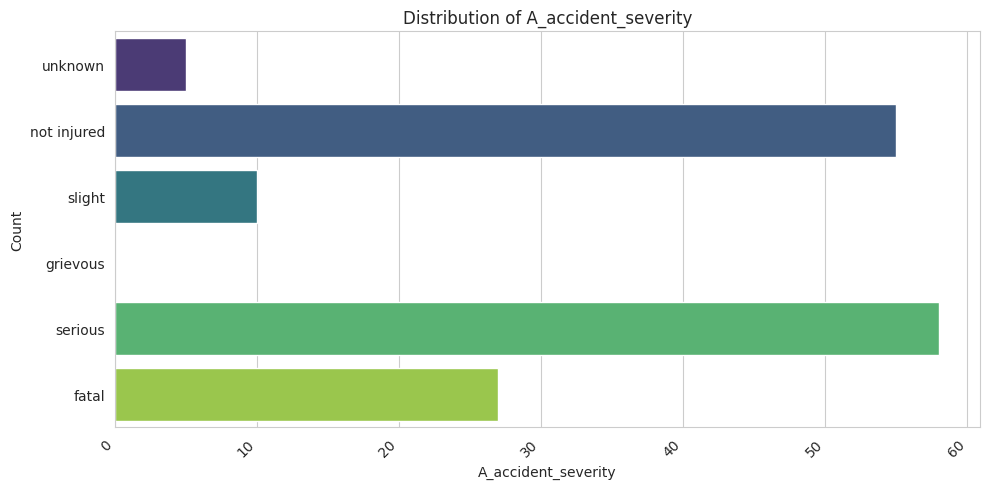

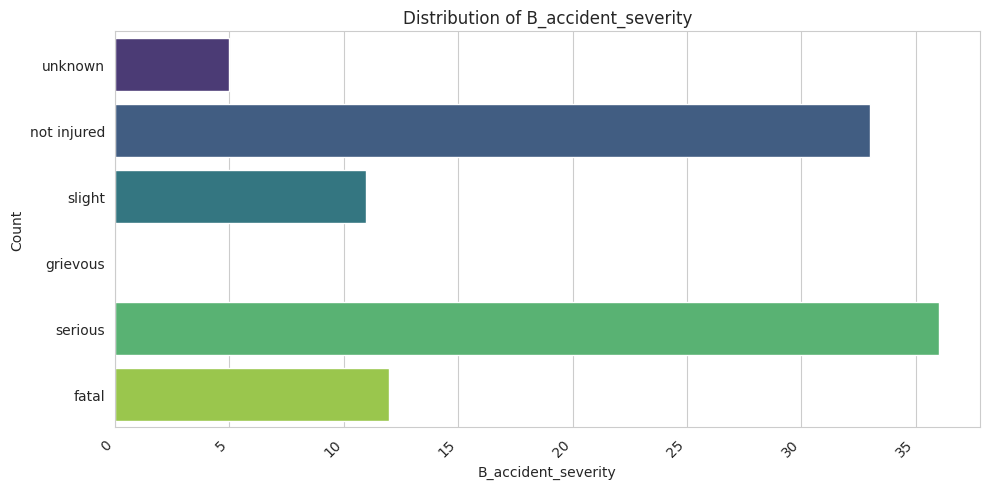

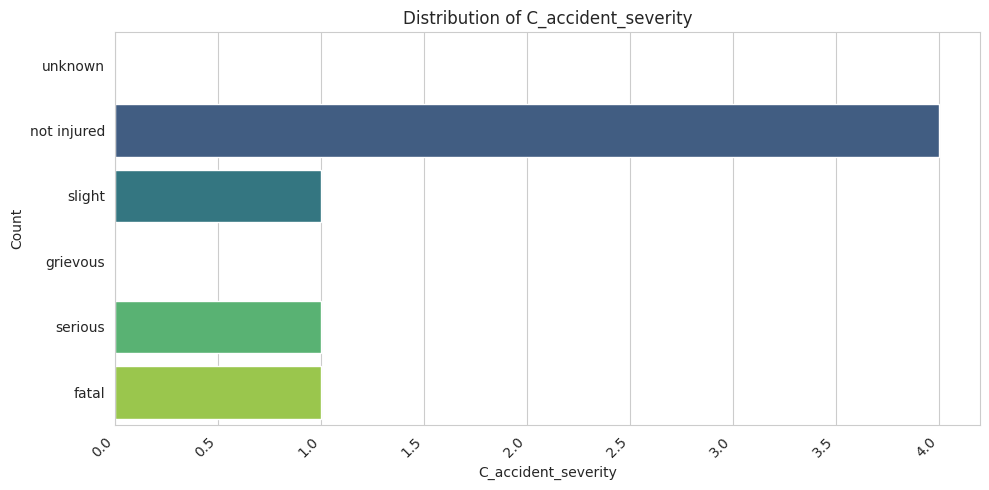

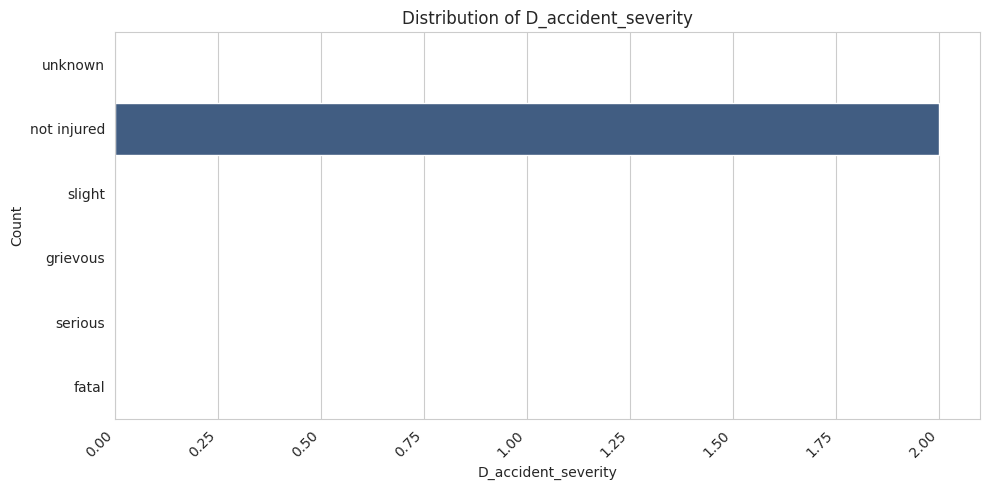

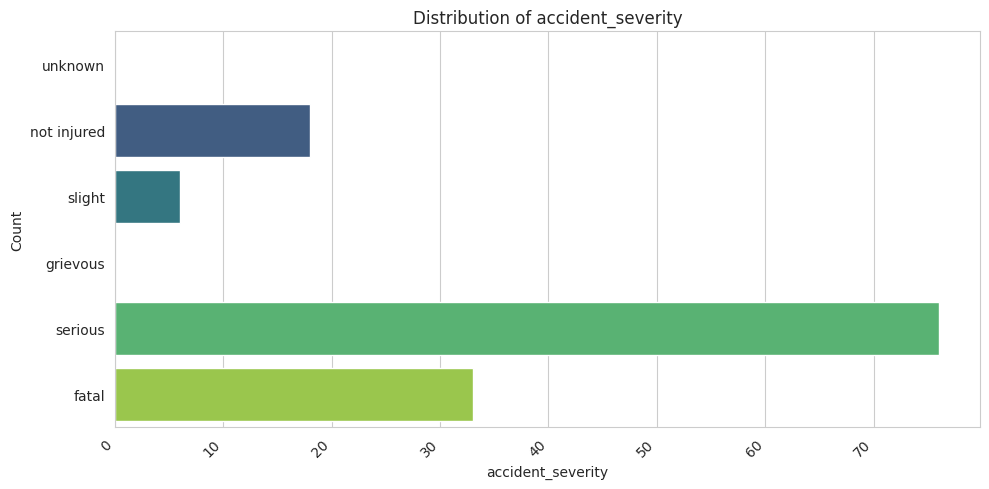

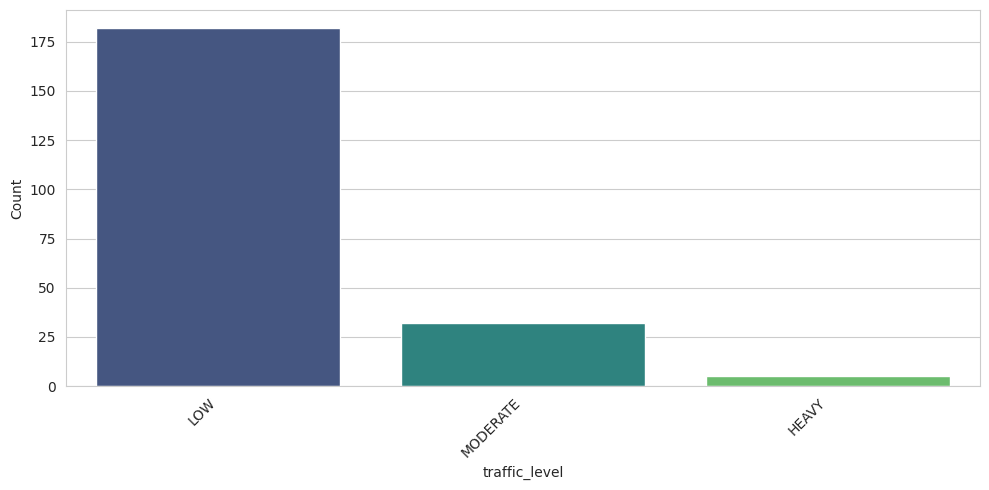

Finished generating count plots for ordinal variables.


In [194]:
ordinal_columns = classification_df[classification_df['Measurement Scale'] == 'Ordinal']['Column Name'].tolist()

# Define the order of severity levels for plotting
severity_order_labels = ['unknown', 'not injured', 'slight', 'grievous', 'serious', 'fatal']

print("Generating count plots for ordinal variables:")
for col in ordinal_columns:
  if col == 'traffic_level' :
    continue

  plt.figure(figsize=(10, 5))
  sns.countplot(data=df, y=col, order=severity_order_labels, palette='viridis')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

col = 'traffic_level'
severity_order_labels = ['LOW', 'MODERATE', 'HEAVY']
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x=col, order=severity_order_labels, palette='viridis')
plt.xlabel(col)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Finished generating count plots for ordinal variables.")

Conclusion 2:

1.   In the overall accident severity ranking there is no observations with is unknown!



### 2.4 **Interval** data analysis

In [195]:
interval_columns = classification_df[classification_df['Measurement Scale'] == 'Interval']['Column Name'].tolist()
print("Summary Statistics for Interval Variables:")
display(df[interval_columns].describe())

Summary Statistics for Interval Variables:


,num_drivers_total,num_vehicle_unknown,num_vehicle_pedestrian,num_vehicle_bicycle,num_vehicle_motorbike,num_vehicle_car,num_vehicle_van,num_vehicle_bus,temperature_max,temperature_min,temperature_mean
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.666667,0.009132,0.077626,0.031963,0.488584,0.858447,0.141553,0.050228,23.938813,18.605936,21.123744
std,0.600713,0.095344,0.284785,0.176306,0.553228,0.644710,0.374728,0.218916,6.239876,4.989651,5.445155
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.400000,9.000000,11.800000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.900000,13.900000,16.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,25.000000,18.600000,21.200000
75%,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,29.500000,23.250000,26.100000
max,4.000000,1.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,37.500000,26.400000,31.100000


Generating box plots for temperature variables on a single graph:


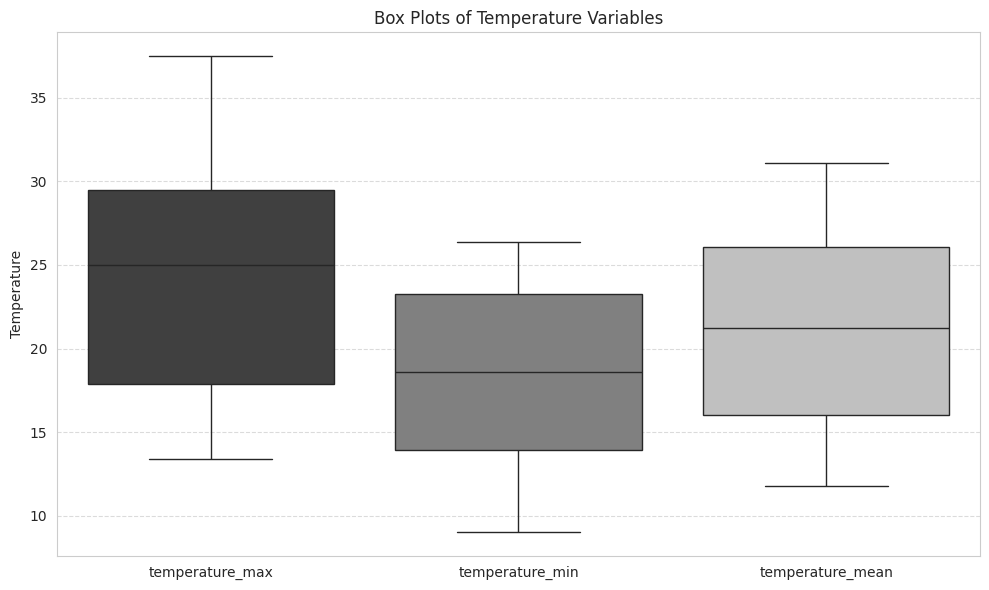

Finished generating box plots for temperature variables.
Generating box plots for drivers/vehicle on a single graph:


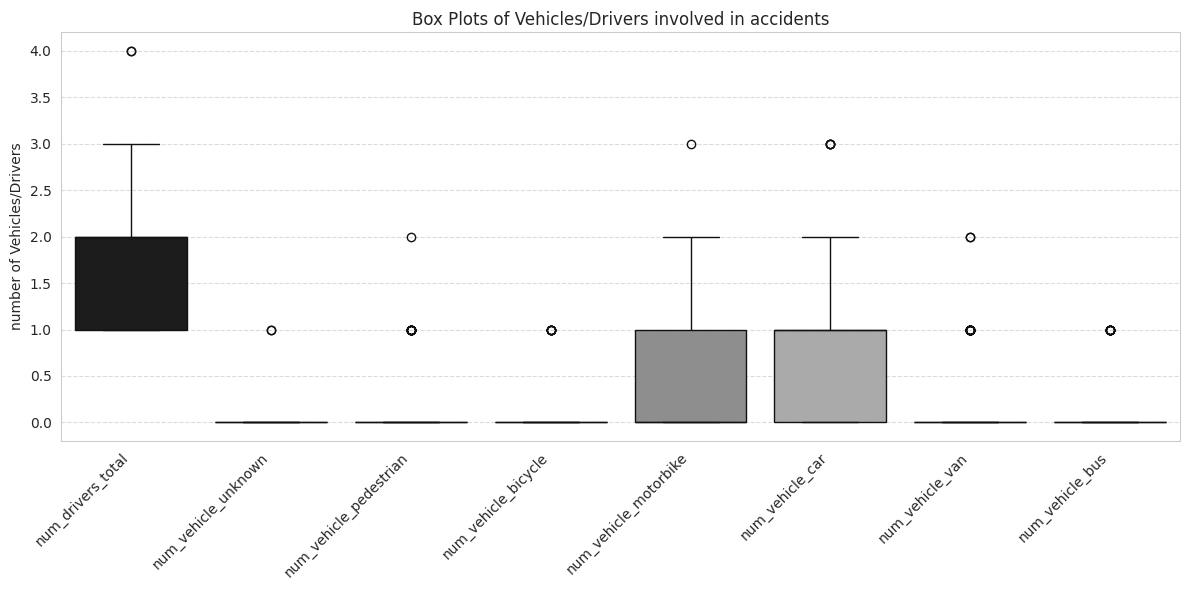

In [196]:
temperature_columns = ['temperature_max', 'temperature_min', 'temperature_mean']

print("Generating box plots for temperature variables on a single graph:")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[temperature_columns], palette='grey')
plt.title('Box Plots of Temperature Variables')
plt.ylabel('Temperature')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Finished generating box plots for temperature variables.")

driver_vehicle_columns = ['num_drivers_total', 'num_vehicle_unknown', 'num_vehicle_pedestrian', 'num_vehicle_bicycle', 'num_vehicle_motorbike', 'num_vehicle_car', 'num_vehicle_van', 'num_vehicle_bus' ]

print("Generating box plots for drivers/vehicle on a single graph:")

sns.boxplot(data=df[driver_vehicle_columns], palette='grey')
plt.title('Box Plots of Vehicles/Drivers involved in accidents')
plt.ylabel('number of Vehicles/Drivers')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Conclusion 1:**

How should we interpret the fact that MIN and MAX temperatures overlap?!

Can we improve on box plots of vehicles / drivers -- mainly cars and motorbikes

### 2.5 **Ratio** data analysis

In [197]:
ratio_columns = classification_df[classification_df['Measurement Scale'] == 'Ratio']['Column Name'].tolist()
print("Summary Statistics for Ratio Variables:")
display(df[ratio_columns].info())

Summary Statistics for Ratio Variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A_driver_age       219 non-null    object 
 1   A_number_injured   219 non-null    object 
 2   B_driver_age       133 non-null    object 
 3   B_number_injured   133 non-null    object 
 4   C_driver_age       11 non-null     object 
 5   C_number_injured   11 non-null     float64
 6   D_driver_age       2 non-null      float64
 7   D_number_injured   2 non-null      float64
 8   total_injured      219 non-null    int64  
 9   precipitation_sum  219 non-null    float64
 10  windspeed_max      219 non-null    float64
 11  traffic_ratio      219 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 20.7+ KB


None

In [198]:
columns_to_clean = [
    'A_driver_age', 'A_number_injured',
    'B_driver_age', 'B_number_injured',
    'C_driver_age', 'C_number_injured',
    'D_driver_age', 'D_number_injured'
]

for col in columns_to_clean:
    if col in df.columns and df[col].dtype == 'object':
        # Replace 'none' and 'unknown' with blank
        df[col] = df[col].replace('none', '', regex=True)
        df[col] = df[col].replace('unknown', '', regex=True)


print("✓ Specified columns have been cleaned (replaced 'none' and 'unknown' with blank).")

✓ Specified columns have been cleaned (replaced 'none' and 'unknown' with blank).


In [199]:
print(df['A_driver_age'].value_counts(dropna=False))

A_driver_age
      17
22    10
23     9
34     9
30     7
      ..
17     1
55     1
68     1
82     1
84     1
Name: count, Length: 67, dtype: int64


In [200]:
print("Converting 'Ratio' columns to float64...")

for col in ratio_columns:
    if df[col].dtype == 'object':
        # Replace common non-numeric strings with NaN before conversion
        # Use .astype(str) to ensure operations work even if there are mixed types before conversion
        df[col] = df[col].astype(str).str.lower().replace([''], np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    elif df[col].dtype == 'int64':
        # Convert int64 to float64 for consistency with other numerical ratio types
        df[col] = df[col].astype('float64')
    # If already float64, no action needed

print("Conversion complete. Displaying info for ratio columns:")
display(df[ratio_columns].info())

Converting 'Ratio' columns to float64...
Conversion complete. Displaying info for ratio columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A_driver_age       197 non-null    float64
 1   A_number_injured   217 non-null    float64
 2   B_driver_age       110 non-null    float64
 3   B_number_injured   132 non-null    float64
 4   C_driver_age       9 non-null      float64
 5   C_number_injured   11 non-null     float64
 6   D_driver_age       2 non-null      float64
 7   D_number_injured   2 non-null      float64
 8   total_injured      219 non-null    float64
 9   precipitation_sum  219 non-null    float64
 10  windspeed_max      219 non-null    float64
 11  traffic_ratio      219 non-null    float64
dtypes: float64(12)
memory usage: 20.7 KB


None

In [201]:
display(df[ratio_columns].describe())

,A_driver_age,A_number_injured,B_driver_age,B_number_injured,C_driver_age,C_number_injured,D_driver_age,D_number_injured,total_injured,precipitation_sum,windspeed_max,traffic_ratio
count,197.000000,217.000000,110.000000,132.000000,9.000000,11.000000,2.00000,2.0,219.000000,219.000000,219.000000,219.000000
mean,42.167513,0.824885,42.109091,0.787879,58.222222,0.818182,41.00000,0.0,1.333333,1.112785,20.718721,1.042037
std,17.630486,0.880198,17.854841,0.642399,18.565949,0.750757,19.79899,0.0,1.046327,5.172929,9.788767,0.183529
min,2.000000,0.000000,5.000000,0.000000,29.000000,0.000000,27.00000,0.0,0.000000,0.000000,6.100000,0.722581
25%,28.000000,0.000000,30.000000,0.000000,50.000000,0.000000,34.00000,0.0,1.000000,0.000000,12.900000,0.919255
50%,39.000000,1.000000,38.500000,1.000000,67.000000,1.000000,41.00000,0.0,1.000000,0.000000,19.400000,1.018868
75%,54.000000,1.000000,52.750000,1.000000,68.000000,1.000000,48.00000,0.0,2.000000,0.400000,26.350000,1.098309
max,86.000000,9.000000,87.000000,4.000000,81.000000,2.000000,55.00000,0.0,9.000000,66.500000,53.400000,2.080000


**Conclusion 1:**

Some of the 'age and 'injured' observations are not listed as integers/ floa due to data containing ' unknown / none'

Action 1:
ignore text values from df -- change to blank
Then convert columns to float 64

Generating Probability Density Function (PDF) plots for Ratio variables:


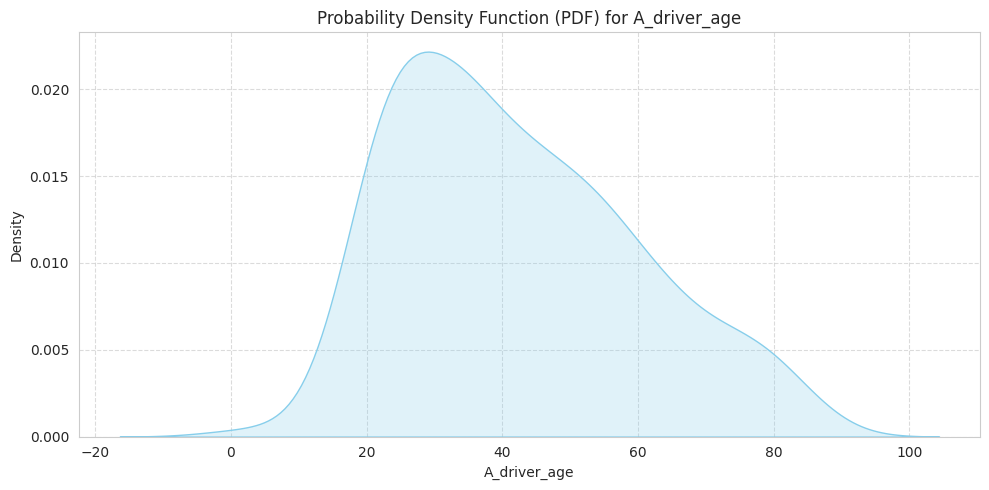

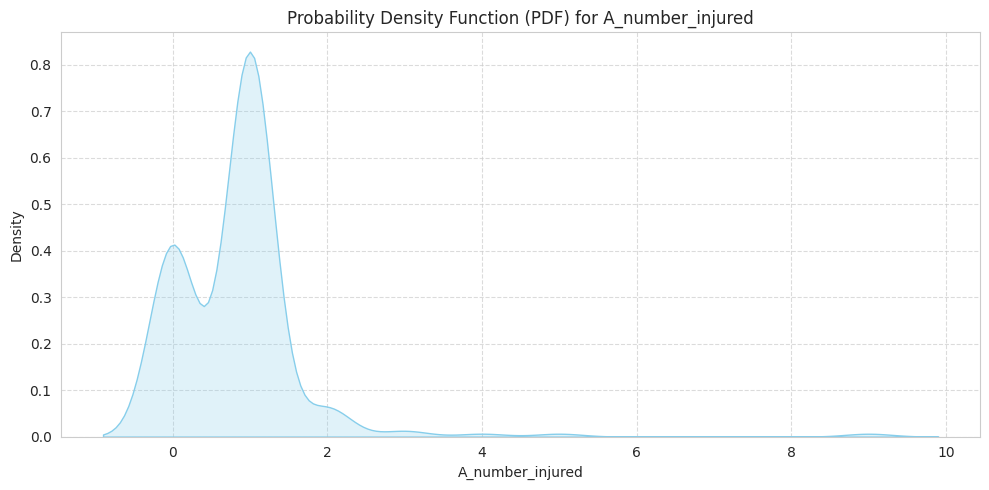

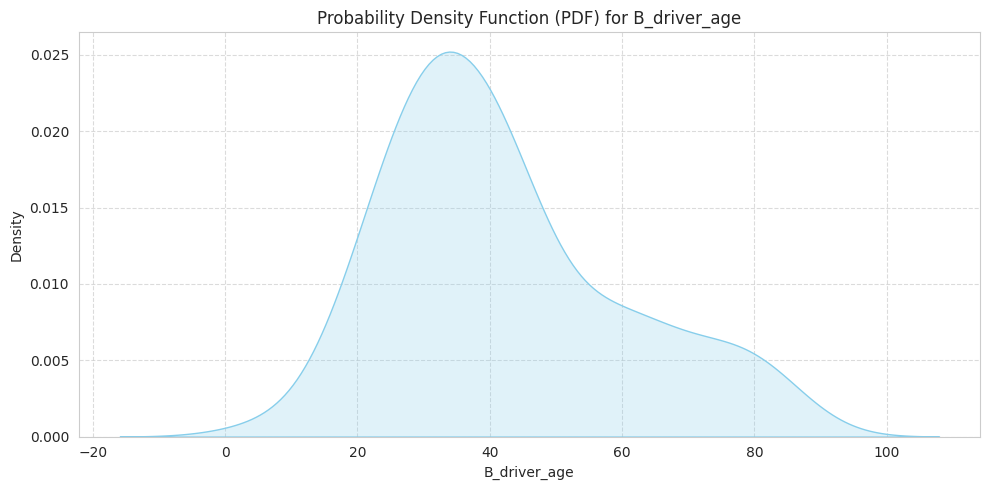

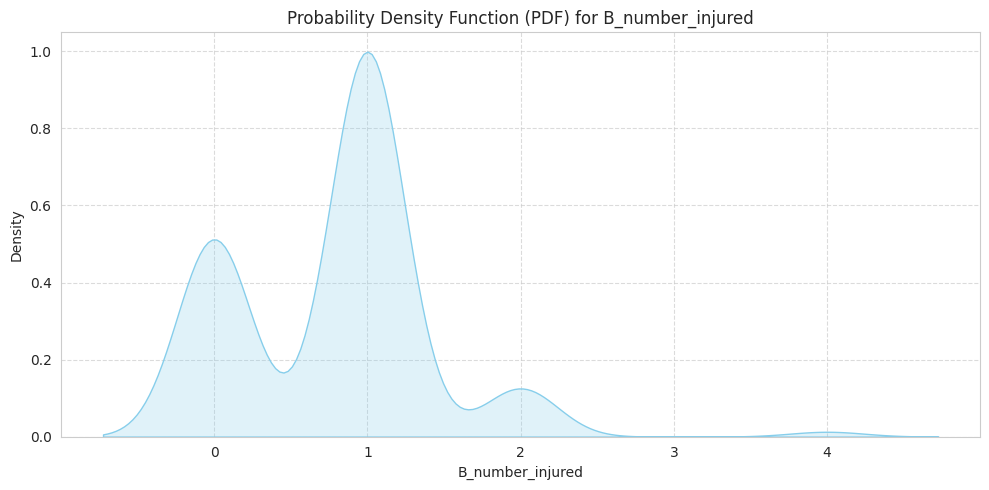

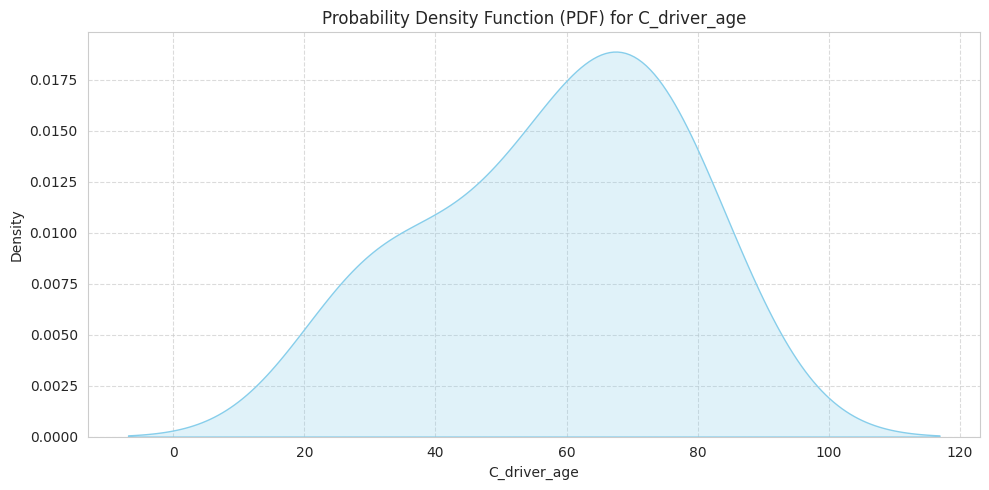

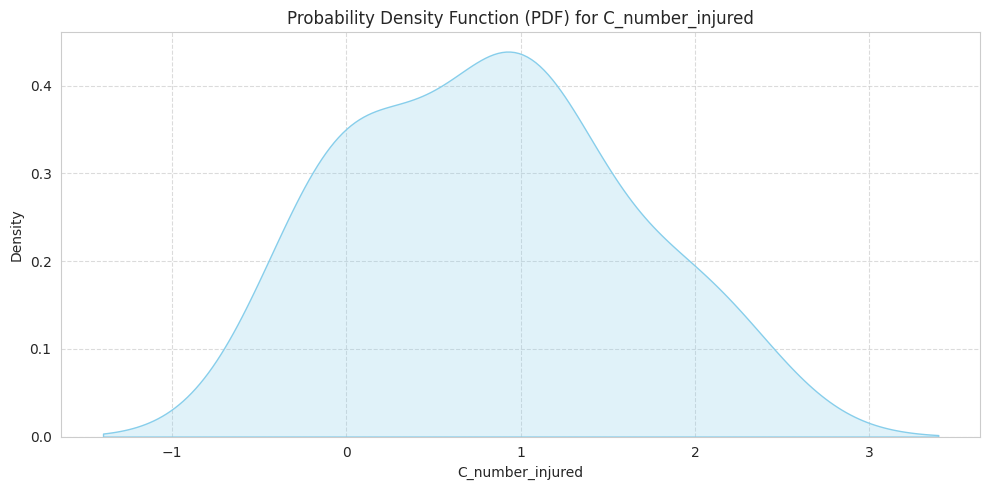

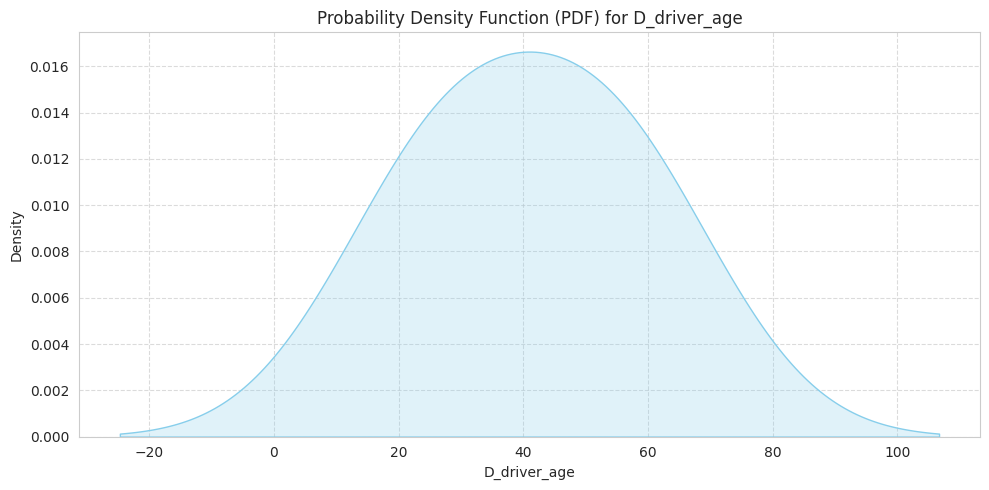

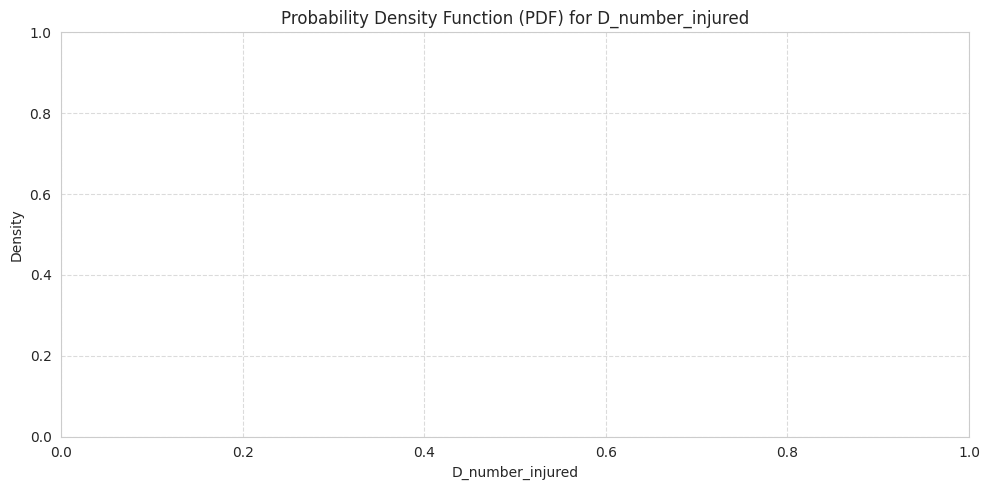

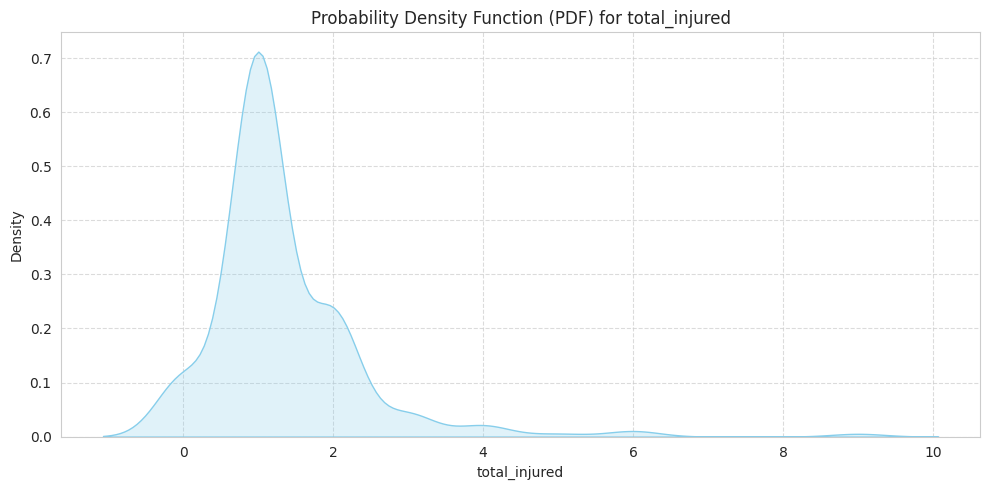

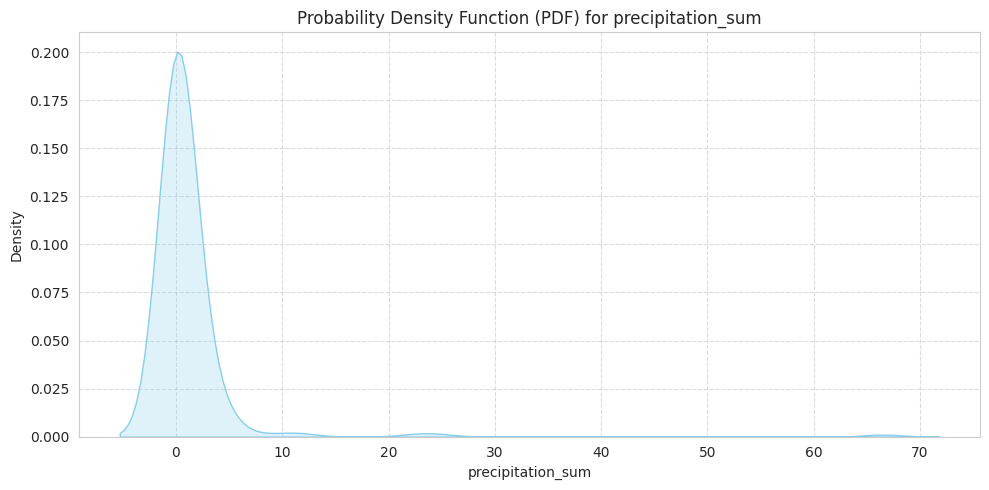

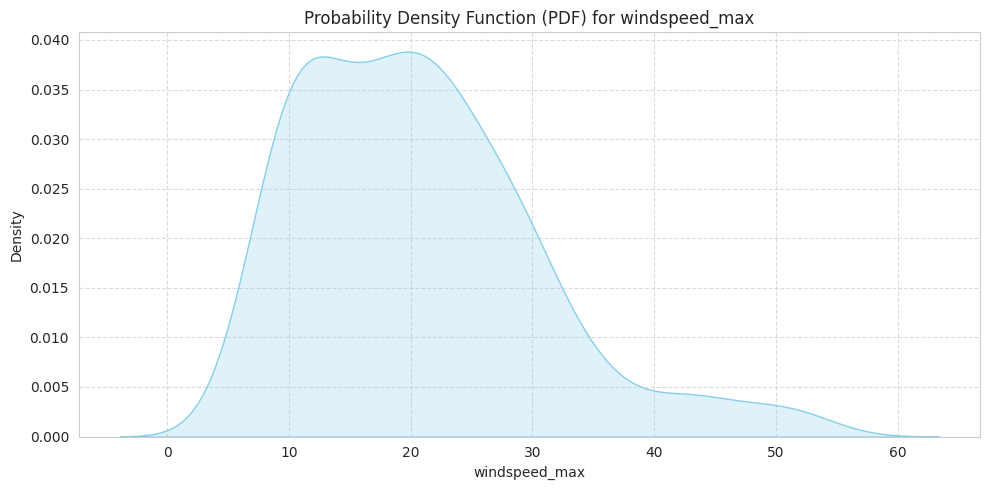

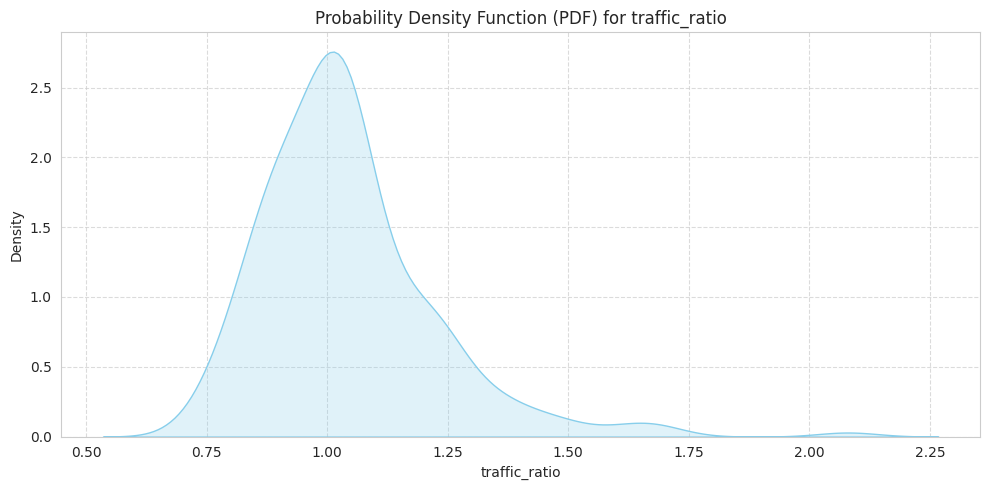

Finished generating PDF plots for Ratio variables.


In [202]:
print("Generating Probability Density Function (PDF) plots for Ratio variables:")

for col in ratio_columns:
  plt.figure(figsize=(10, 5))
  sns.kdeplot(df[col], fill=True, color='skyblue')
  plt.title(f'Probability Density Function (PDF) for {col}')
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.grid(True, linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

print("Finished generating PDF plots for Ratio variables.")

**Conclusion 2:**
converting to float resulted in fractional number of injuries!!

## 3. Correlation analysis [Filtering]

Scatter plots of relevant data

Generating scatter plot matrix for features related to number of drivers and vehicles...


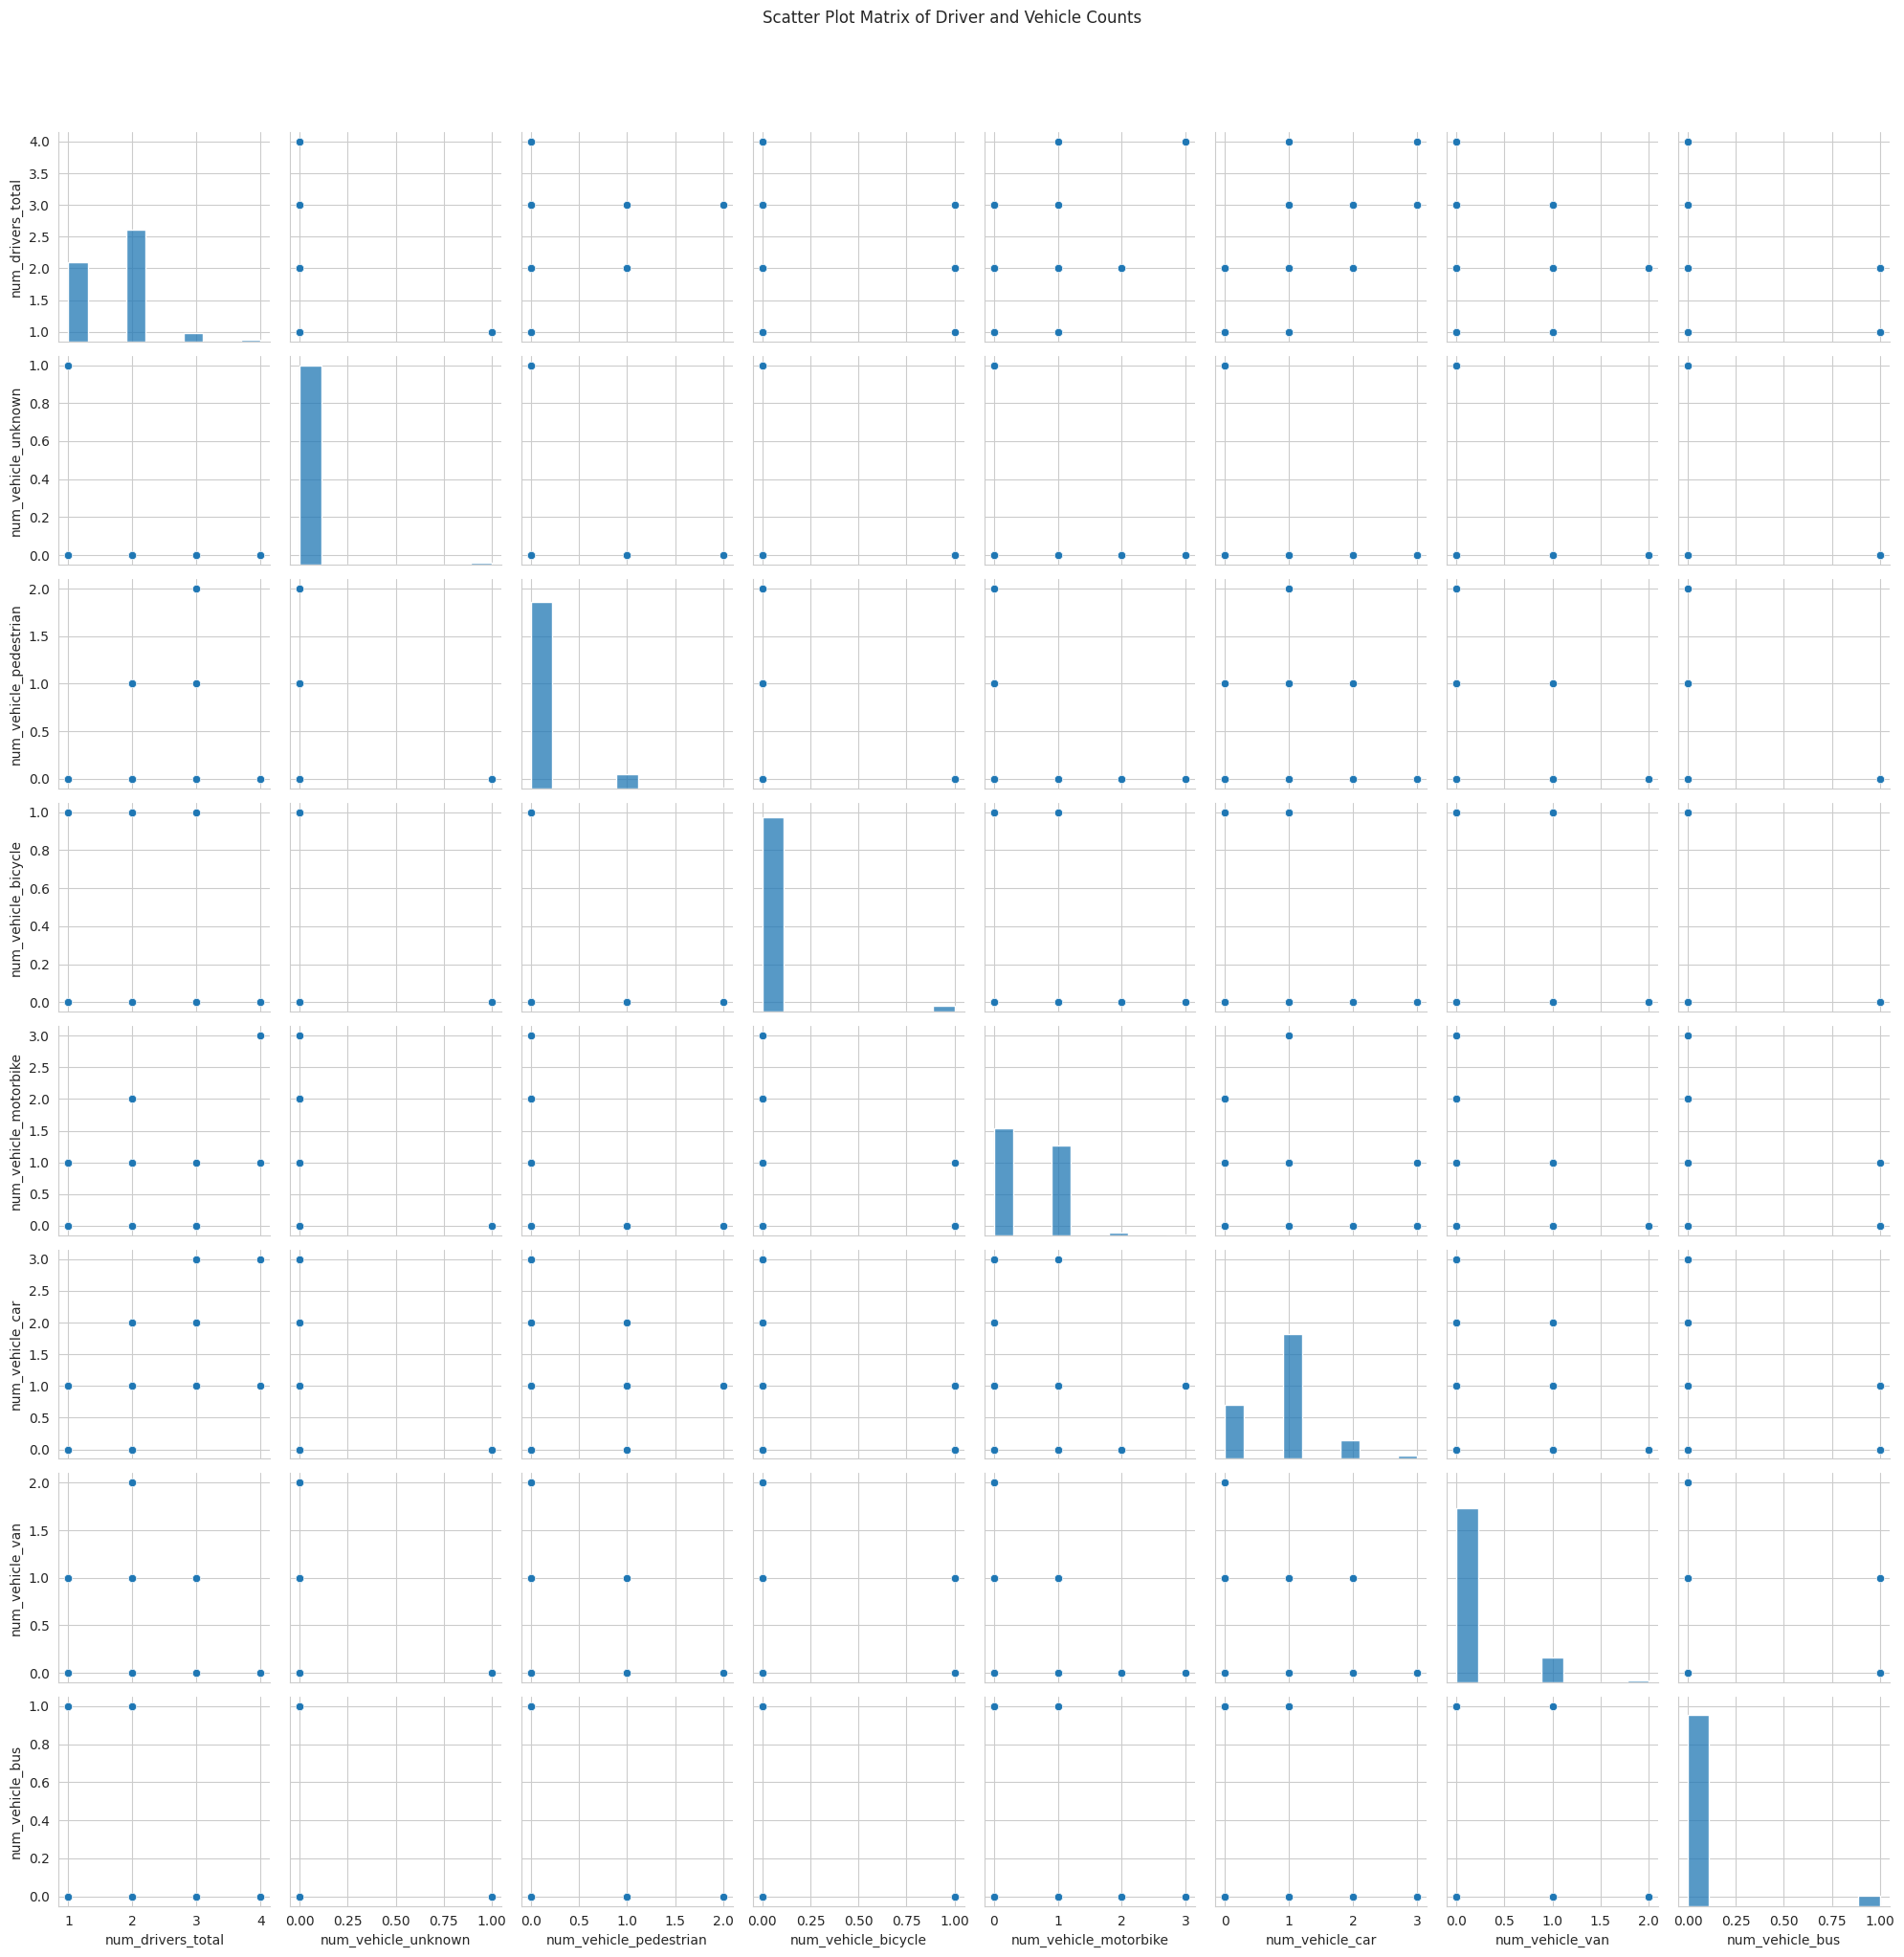

Finished generating scatter plot matrix.


In [203]:
# Define the list of columns for the scatter plot matrix
columns_for_pairplot = [
    'num_drivers_total',
    'num_vehicle_unknown',
    'num_vehicle_pedestrian',
    'num_vehicle_bicycle',
    'num_vehicle_motorbike',
    'num_vehicle_car',
    'num_vehicle_van',
    'num_vehicle_bus'
]

# Create a subset DataFrame with only the selected columns
df_subset = df[columns_for_pairplot]

# Generate the scatter plot matrix
print("Generating scatter plot matrix for features related to number of drivers and vehicles...")
sns.pairplot(df_subset)
plt.suptitle('Scatter Plot Matrix of Driver and Vehicle Counts', y=1.02) # Adjust  position
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent overlap
plt.show()
print("Finished generating scatter plot matrix.")

No apparent relationship

Generating scatter plot matrix for driver age columns...


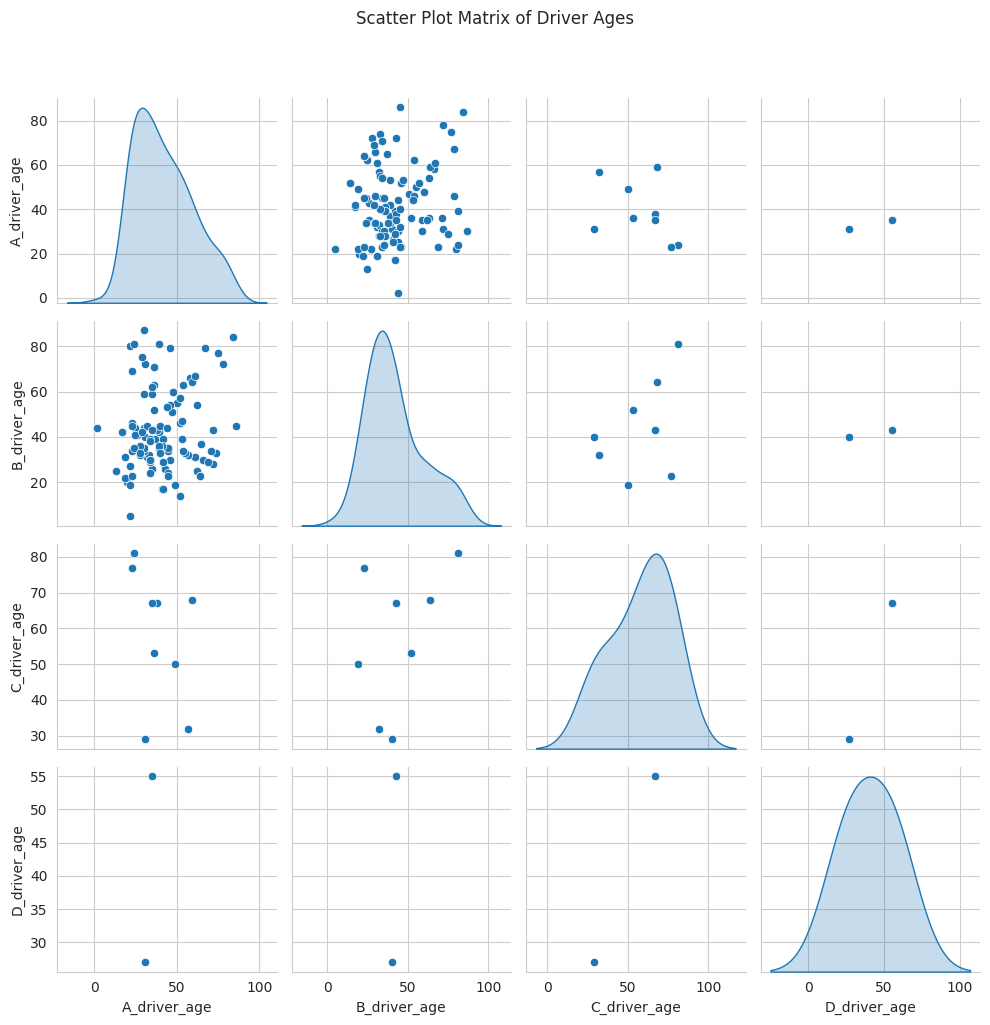

Finished generating scatter plot matrix for driver ages.


In [204]:
# Define the list of age columns
age_columns = ['A_driver_age', 'B_driver_age', 'C_driver_age', 'D_driver_age']

# Create a temporary DataFrame with only the age columns
# Ensure all age columns are numeric by coercing errors to NaN
age_df = df[age_columns].apply(pd.to_numeric, errors='coerce')

print("Generating scatter plot matrix for driver age columns...")
sns.pairplot(age_df, diag_kind='kde') # Use kde for diagonal plots to show density
plt.suptitle('Scatter Plot Matrix of Driver Ages', y=1.02) # Adjust suptitle position
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()
print("Finished generating scatter plot matrix for driver ages.")

Apparent relationship is evident

Skipping column date_published due to unhandled data type: datetime64[ns]
Skipping column accident_datetime due to unhandled data type: datetime64[ns]


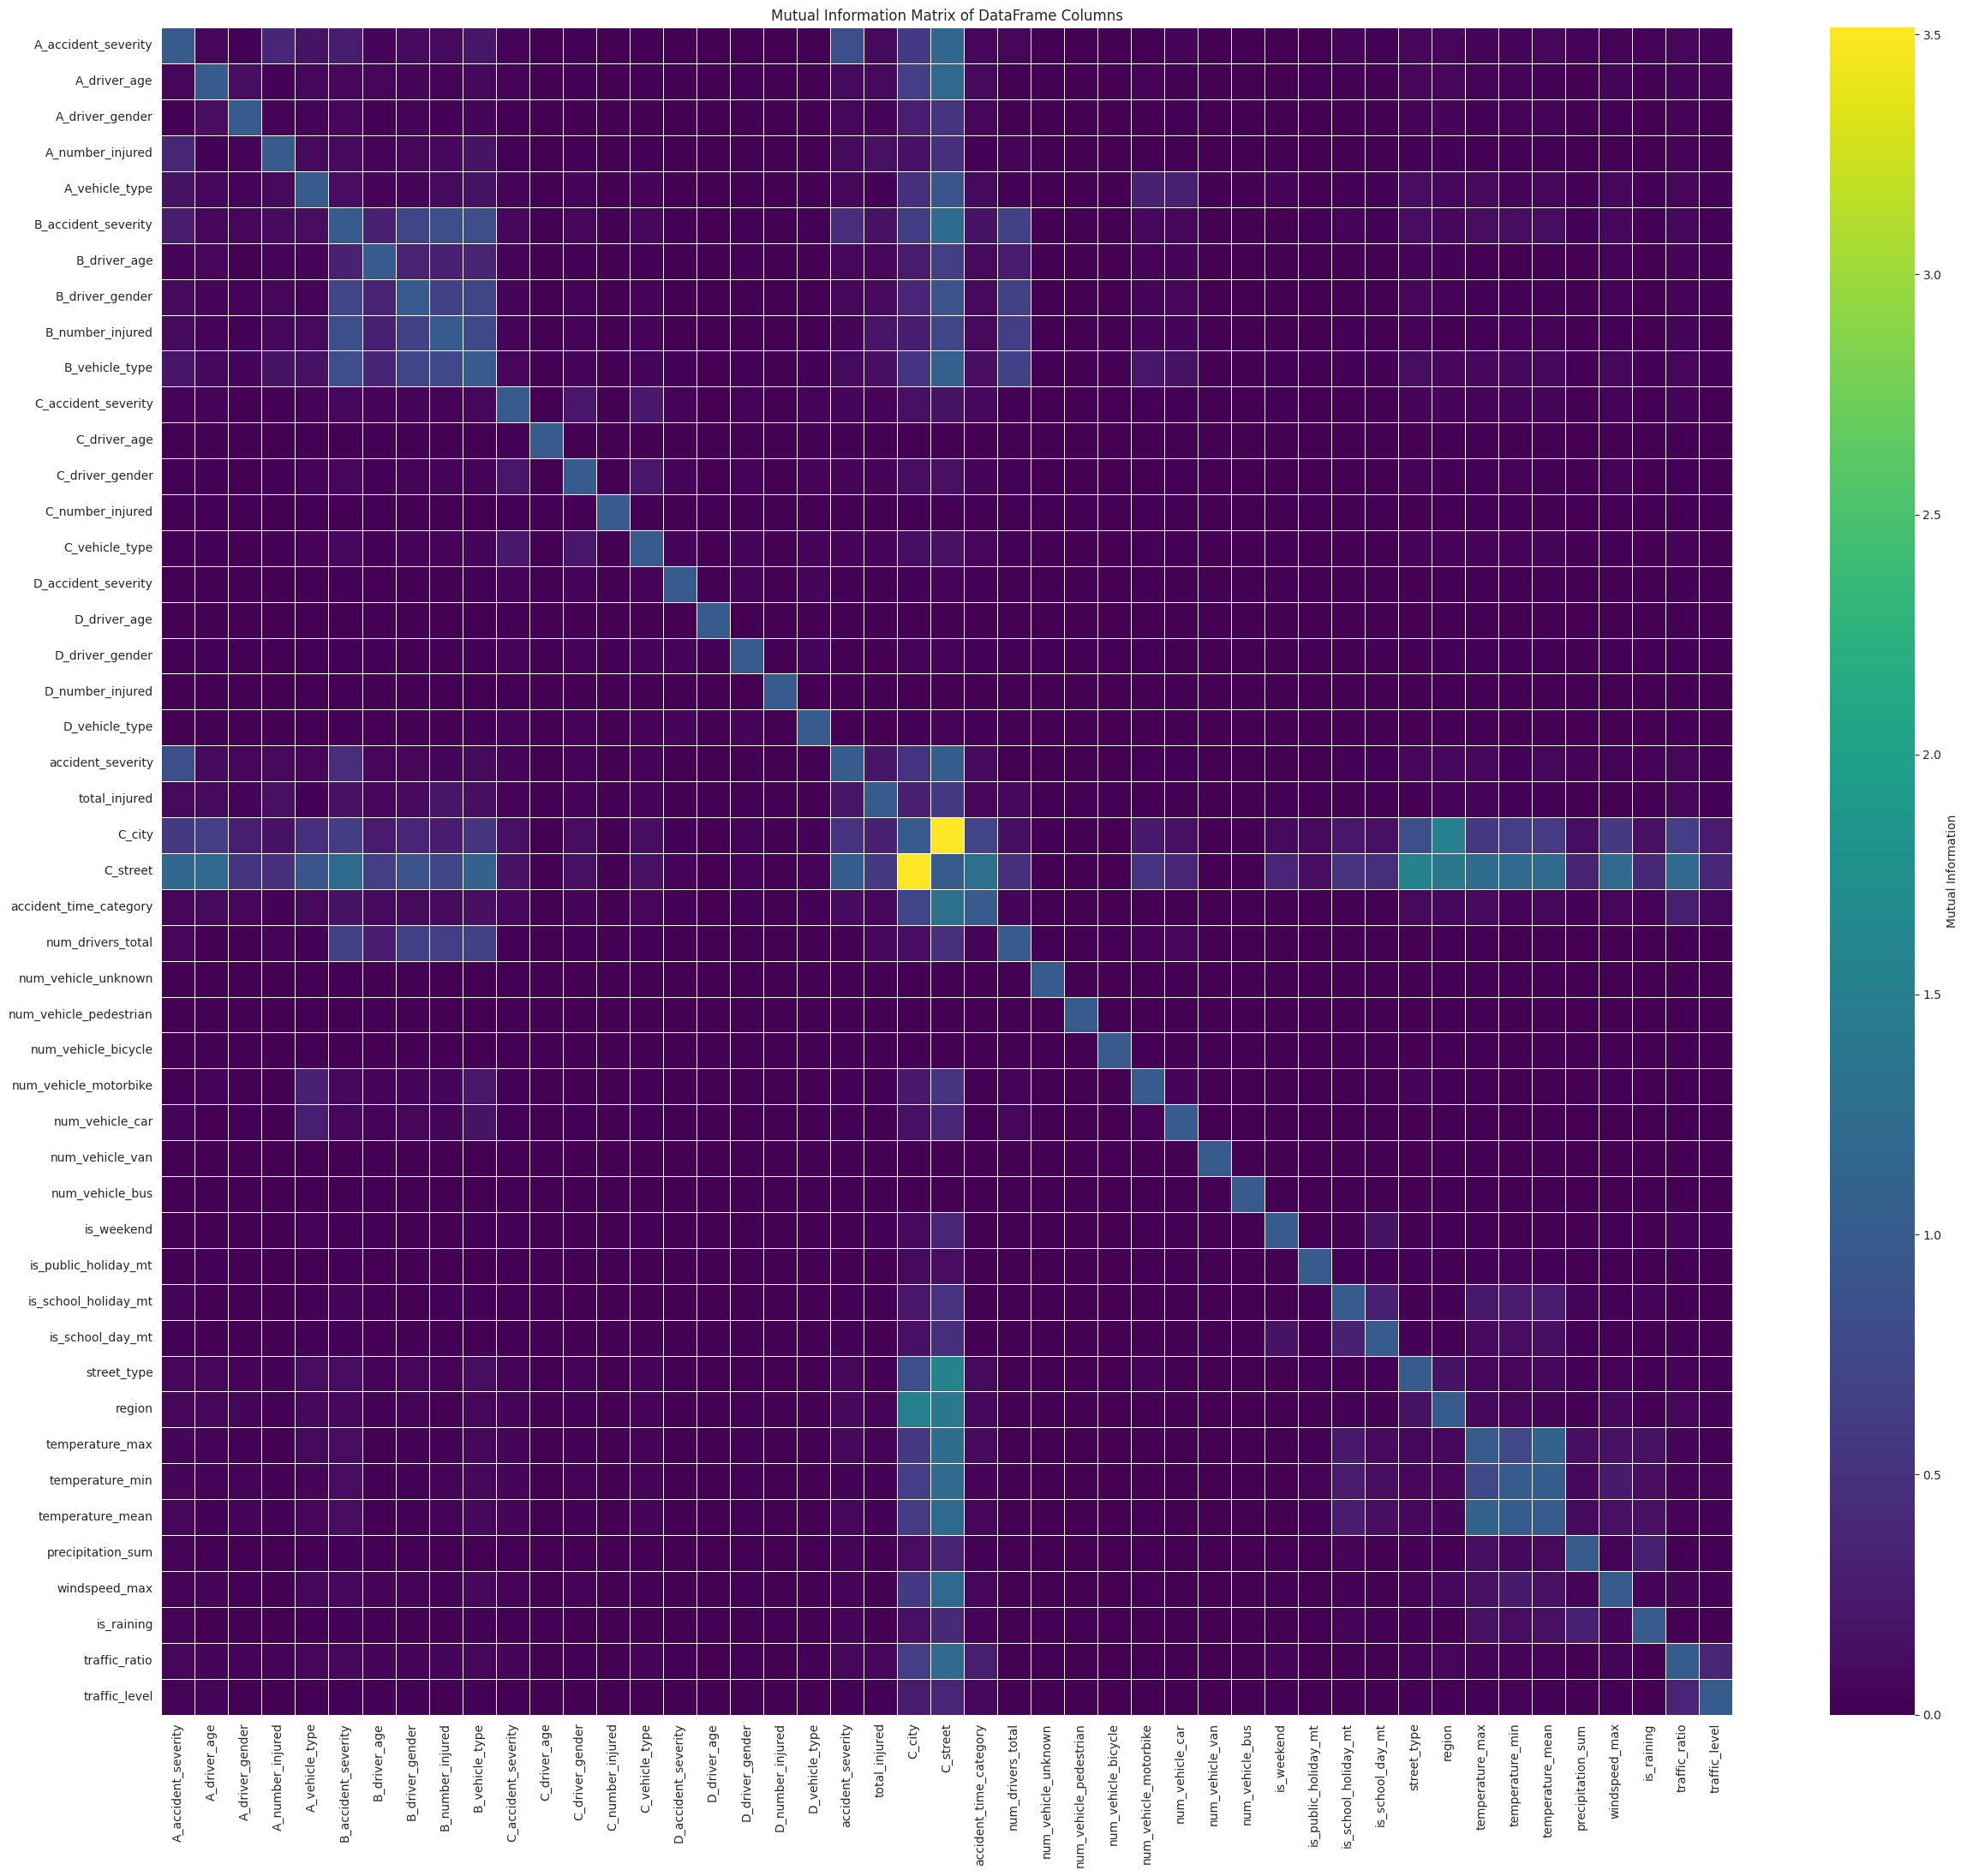

In [205]:
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.metrics import mutual_info_score


def calculate_mutual_information_matrix_generic(dataframe, n_bins_for_numeric=5):
    """
    Calculates a Mutual Information matrix for a DataFrame using generic processing.
    - Excludes 'id', 'title', 'content'.
    - Categorical/object/boolean columns are LabelEncoded after filling NaNs with 'missing_category_mi'.
    - Numeric columns are binned using KBinsDiscretizer after filling NaNs with a distinct placeholder.
    """
    df_mi = dataframe.copy()

    # Exclude truly textual/identifier columns
    excluded_columns = ['id', 'title', 'content']
    selected_columns = [col for col in df_mi.columns if col not in excluded_columns]
    df_mi = df_mi[selected_columns]

    processed_data = pd.DataFrame(index=df_mi.index)

    for col in selected_columns:
        if df_mi[col].dtype == 'object' or df_mi[col].dtype == 'bool':
            # For categorical/boolean, fill NaNs and LabelEncode
            temp_series = df_mi[col].astype(str).fillna('missing_category_mi')
            le = LabelEncoder()
            processed_data[col] = le.fit_transform(temp_series)
        elif pd.api.types.is_numeric_dtype(df_mi[col]):
            # For numeric columns, fill NaNs with a distinct value and then bin
            temp_series = df_mi[col].copy()

            # Use a placeholder for NaNs that will create a distinct category after binning
            # For numerical, min_val - 1 or max_val + 1 to keep it distinct
            if temp_series.isnull().any():
                # If column is entirely NaN, fill with a default and skip binning logic
                if temp_series.min() is np.nan and temp_series.max() is np.nan:
                    processed_data[col] = np.zeros(len(temp_series), dtype=int) # Fill with 0 for all-NaN columns
                    continue

                fill_val = temp_series.min() - 1 if temp_series.min() is not np.nan and temp_series.min() > 0 else -1.0
                temp_series = temp_series.fillna(fill_val)

            # Discretize using KBinsDiscretizer
            # Ensure enough unique values for binning. If not, treat as discrete.
            unique_vals_count = temp_series.nunique()

            if unique_vals_count > 1: # Only bin if there's more than one unique value
                n_bins_actual = min(n_bins_for_numeric, unique_vals_count) # Ensure n_bins doesn't exceed unique count
                if n_bins_actual > 1: # Discretize only if more than 1 bin is possible
                    discretizer = KBinsDiscretizer(n_bins=n_bins_actual, encode='ordinal', strategy='quantile', subsample=None) # subsample=None for small data
                    processed_data[col] = discretizer.fit_transform(temp_series.to_frame())[:, 0]
                else:
                    processed_data[col] = temp_series.astype(int) # Already discrete enough
            else:
                processed_data[col] = temp_series.astype(int) # Already discrete (one unique value)
        else:
            print(f"Skipping column {col} due to unhandled data type: {df_mi[col].dtype}")
            continue

    if processed_data.empty:
        print("No suitable columns found for Mutual Information calculation.")
        return pd.DataFrame()

    # Calculate Mutual Information matrix
    mi_matrix = pd.DataFrame(np.zeros((len(processed_data.columns), len(processed_data.columns))),
                             columns=processed_data.columns, index=processed_data.columns)

    for i in range(len(processed_data.columns)):
        for j in range(i, len(processed_data.columns)): # Iterate only upper triangle for efficiency
            col1 = processed_data.columns[i]
            col2 = processed_data.columns[j]

            if col1 == col2:
                mi_matrix.loc[col1, col2] = 1.0 # Mutual information of a variable with itself is max, set to 1
            else:
                score = mutual_info_score(processed_data[col1], processed_data[col2])
                mi_matrix.loc[col1, col2] = score
                mi_matrix.loc[col2, col1] = score # Matrix is symmetric

    return mi_matrix

# Get the MI matrix using the generic function
mi_matrix = calculate_mutual_information_matrix_generic(df, n_bins_for_numeric=5)

if not mi_matrix.empty:
    plt.figure(figsize=(25, 22)) # Large figure size for potentially many columns
    sns.heatmap(mi_matrix, annot=False, cmap='viridis', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Mutual Information'})
    plt.title('Mutual Information Matrix of DataFrame Columns')
    plt.tight_layout()
    plt.show()
else:
    print("Mutual Information matrix could not be generated.")

Conclusions:

- To understand depth of encoding taking place for 'object' data. Do we need to normalize data beforehand?
- MI reveals city and street carry redundant features
- street type and region also overlap in information
- MI indicate temerature mean, min and max carry redundant information

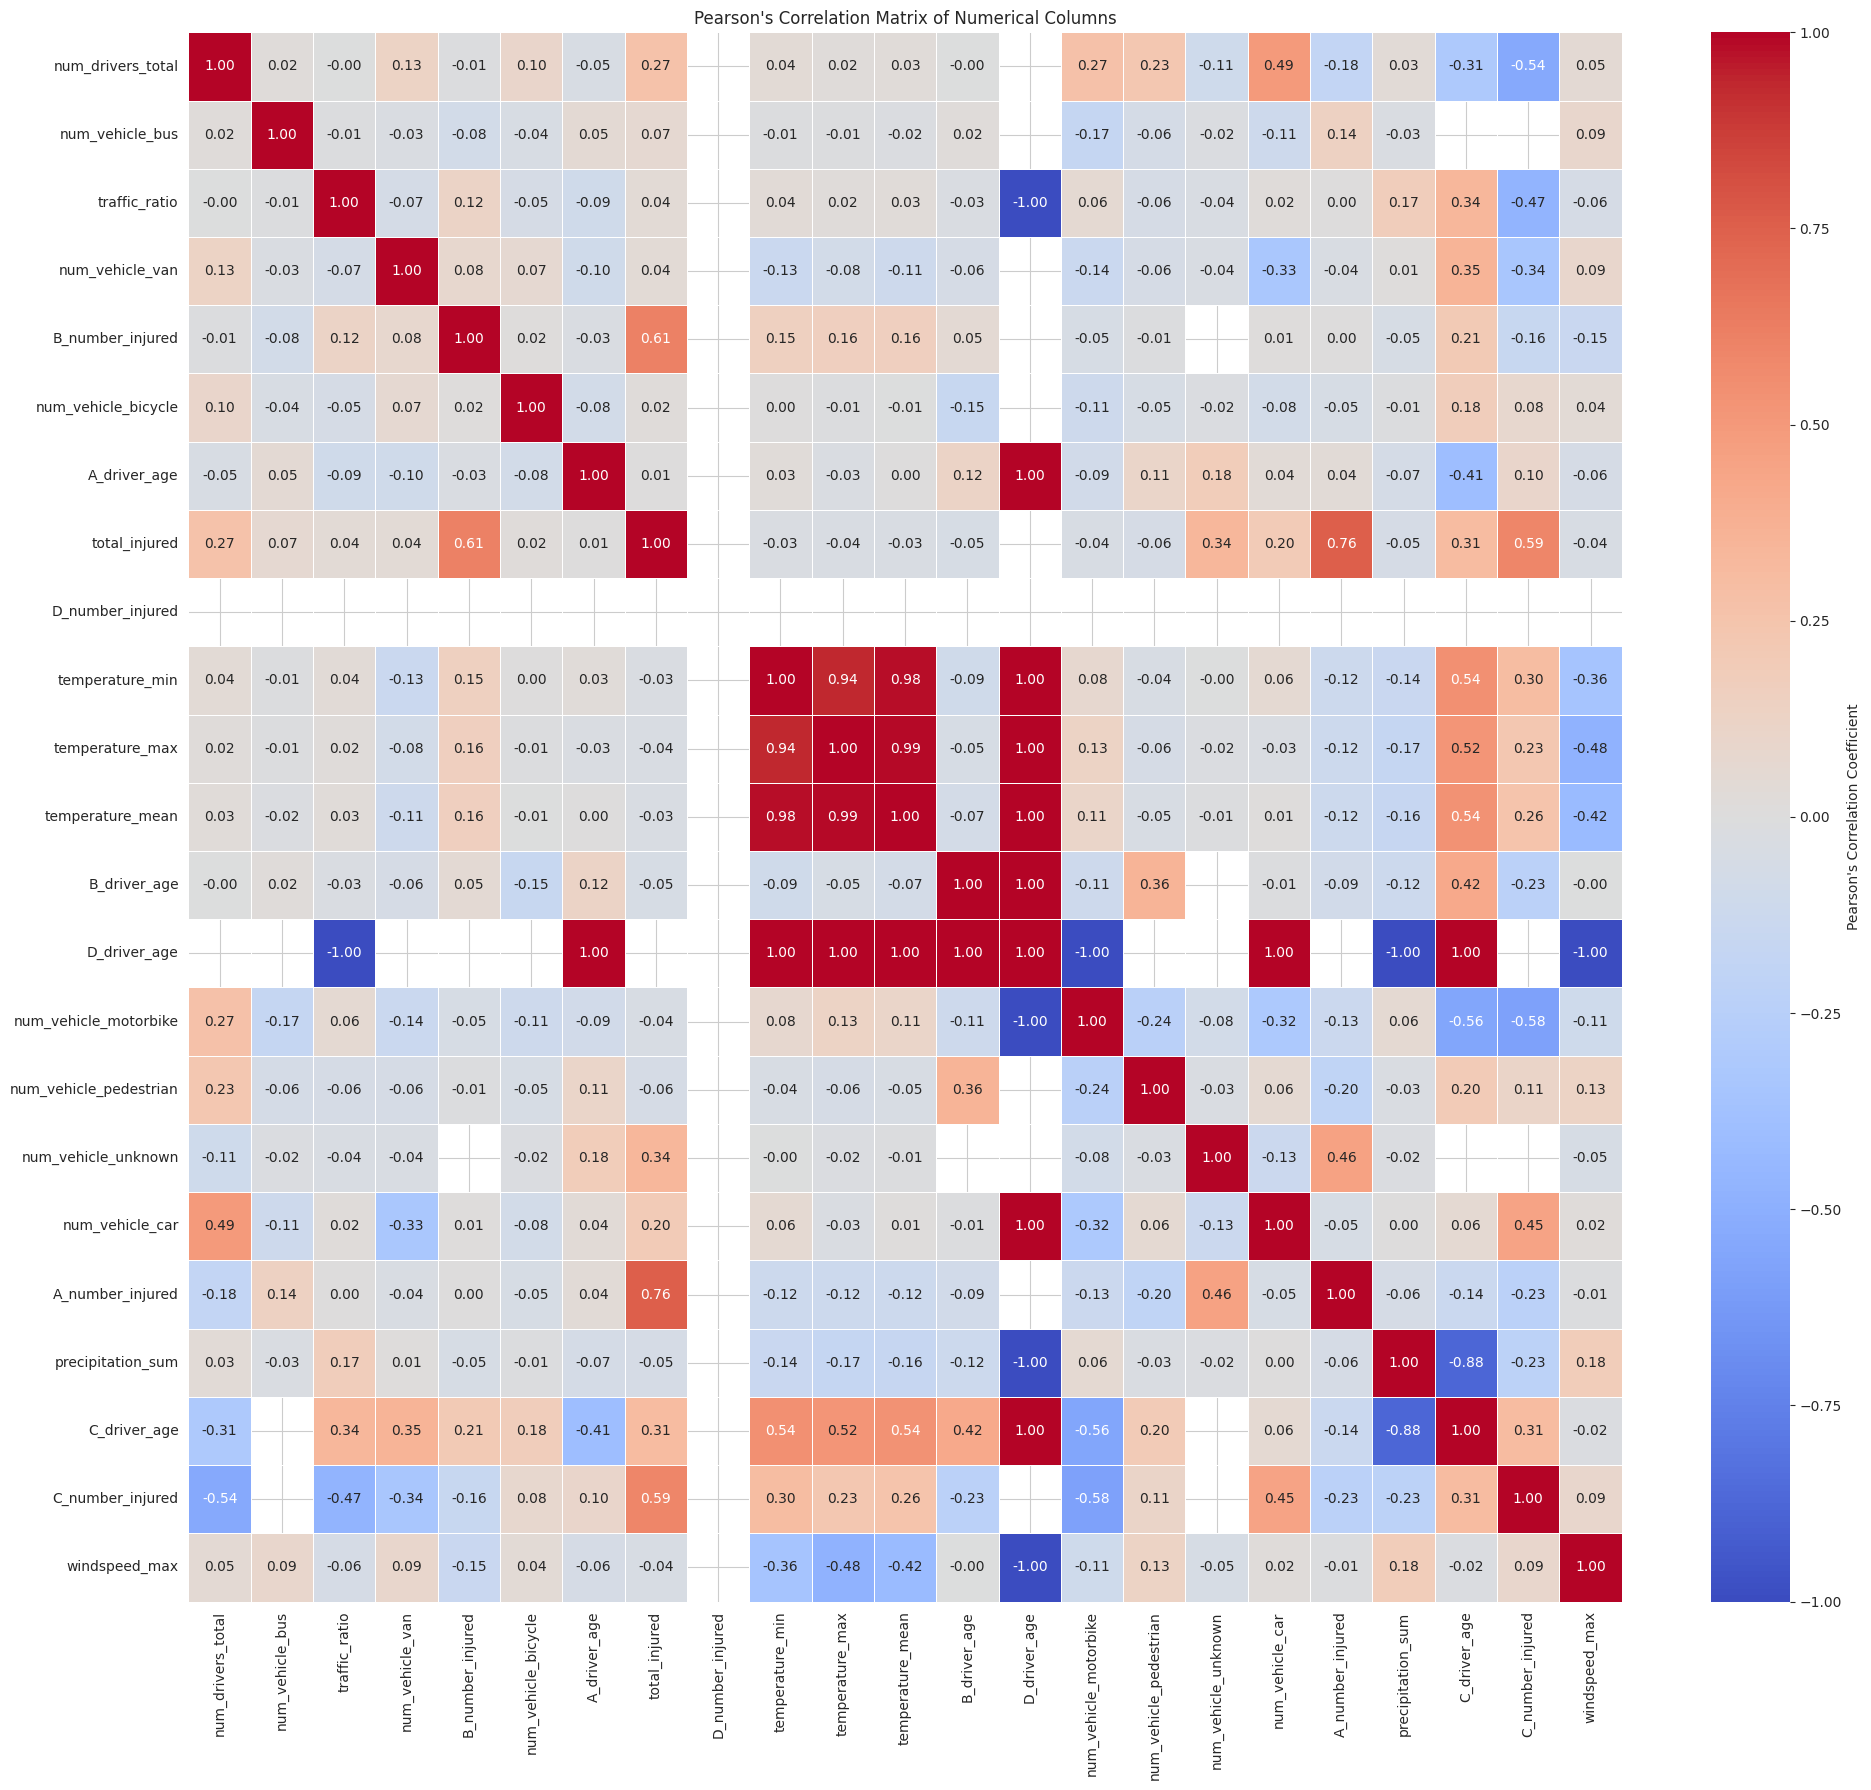

In [206]:

# Get lists of ratio and interval columns from the classification_df
ratio_columns = classification_df[classification_df['Measurement Scale'] == 'Ratio']['Column Name'].tolist()
interval_columns = classification_df[classification_df['Measurement Scale'] == 'Interval']['Column Name'].tolist()

# Combine all numerical columns
numerical_columns = list(set(ratio_columns + interval_columns))

# Create a subset DataFrame containing only these numerical columns
df_numerical = df[numerical_columns].copy()

# Ensure all columns are truly numeric, coercing errors to NaN
for col in df_numerical.columns:
    df_numerical[col] = pd.to_numeric(df_numerical[col], errors='coerce')

# Drop columns that became all NaN after conversion (if any)
df_numerical = df_numerical.dropna(axis=1, how='all')

if not df_numerical.empty and len(df_numerical.columns) > 1:
    # Calculate the Pearson correlation matrix
    pearson_corr_matrix = df_numerical.corr(method='pearson')

    # Plot the heatmap
    plt.figure(figsize=(20, 18)) # Adjust size for readability
    sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
                cbar_kws={'label': "Pearson's Correlation Coefficient"})
    plt.title("Pearson's Correlation Matrix of Numerical Columns")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("No sufficient numerical columns found to generate a Pearson correlation matrix.")


Conclusion:

- ??? cannot decipher the negative correlation (approaching -1)


## 4. Feature Reduction + encoding

## 5. Data Analysis conclusions

● Justify classification/regression task choice

● Produce a final clean tabular dataset